In [2]:
import csv
import pandas as pd

# splitting up the data
#load onto csv file
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
#merge the ratings with the movies 
df = movies.merge(ratings, how="left", on="movieId")
df = df[['movieId', 'title', 'genres', 'userId', 'rating']]
#df.head()
print(df.shape) #(25003471, 5)

(25003471, 5)


In [38]:
df.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,3.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0


In [107]:
# sample the first 20 users 
userIDs = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0 ]
sample_df = df[df.userId.isin(userIDs)]
#sample_df.head()
print(sample_df.shape) #(3739, 5) 

(3739, 5)


In [134]:
sample_df.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,3.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0


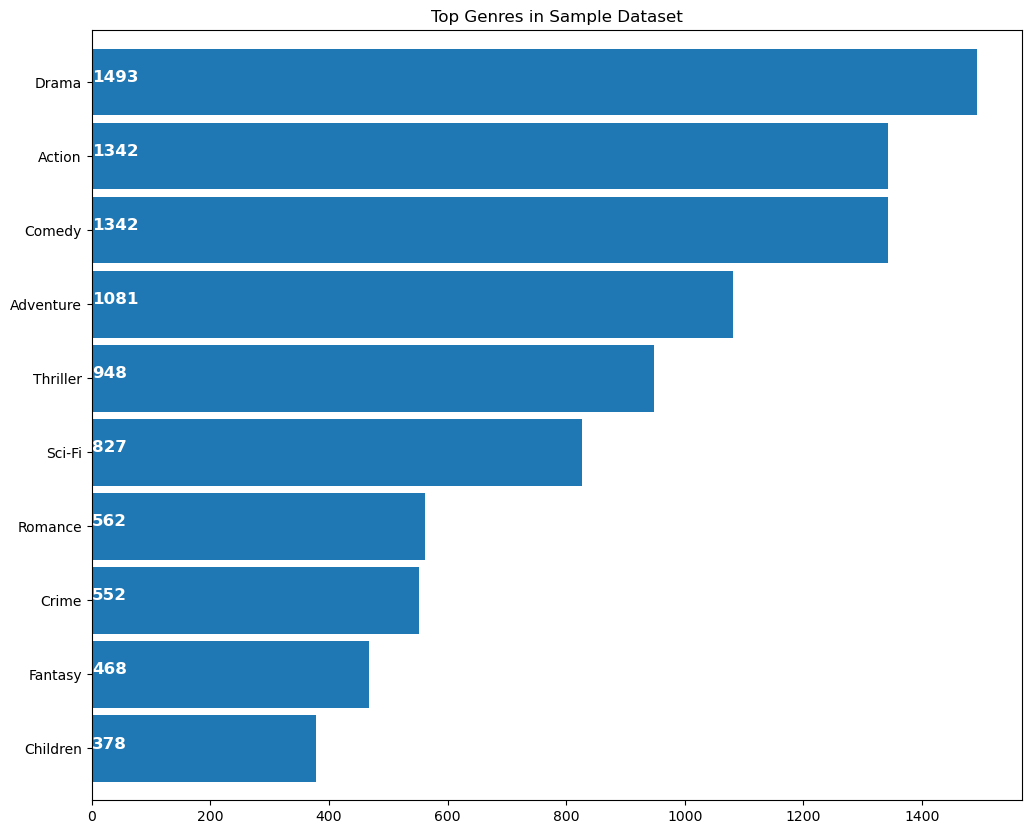

In [4]:
import matplotlib.pyplot as plt  

# reference: https://www.analyticsvidhya.com/blog/2020/08/recommendation-system-k-nearest-neighbors/ in Step 4

# plotting the top genres present within our sample

plt.subplots(figsize=(12,10))
list2 = []
for genres in sample_df['genres']:
    list2.extend(genres.split('|'))
ax = pd.Series(list2).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9)
for j, w in enumerate(pd.Series(list2).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, j, w,fontsize=12,color='white',weight='bold')
plt.title('Top Genres in Sample Dataset')
plt.show()


In [7]:
# creating a list with all unique genres
unique_genres = set()
for genres in sample_df['genres']:
    unique_genres.update(genres.split('|'))

# Display the list of unique genres
print(unique_genres)  # total of 20 unique genres

{'Animation', 'Adventure', 'Children', 'Thriller', 'Action', 'Crime', 'Film-Noir', 'Horror', 'Drama', 'Musical', 'Mystery', 'Fantasy', 'War', 'IMAX', 'Western', 'Romance', 'Documentary', '(no genres listed)', 'Sci-Fi', 'Comedy'}


In [9]:
# one hot encoding to find which genre each movie falls into 
# so creating a column to hold 0 or 1 (binary values) if present or not
def binary(row_genres, unique_genres): 
    binaryList = []
    
    for genre in unique_genres: 
        if genre in row_genres.split('|'): 
            binaryList.append(1)
        else: 
            binaryList.append(0)
    
    return binaryList

sample_df['genres_bin'] = sample_df.apply(lambda row: binary(row['genres'], unique_genres_), axis=1)
sample_df['genres_bin'].head()


C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\627546587.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['genres_bin'] = sample_df.apply(lambda row: binary(row['genres'], unique_genres), axis=1)


0    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
2    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
3    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
4    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
Name: genres_bin, dtype: object

In [59]:
from scipy import spatial
def Similarity(movieId1, movieId2):
    a = sample_df.iloc[movieId1]
    b = sample_df.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    #print(genresA)
    #print(genresB)
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    return genreDistance

print(sample_df.iloc[1])
print(sample_df.iloc[100])

print("The similarity score between these two random movies: ", Similarity(1, 100))

print(sample_df.iloc[1]['genres_bin'])
print(sample_df.iloc[100]['genres_bin'])

# the higher the distance, the less similar the movies are

movieId                                                       1
title                                          Toy Story (1995)
genres              Adventure|Animation|Children|Comedy|Fantasy
userId                                                      3.0
rating                                                      4.0
genres_bin    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
new_id                                                        1
Name: 1, dtype: object
movieId                                                     104
title                                      Happy Gilmore (1996)
genres                                                   Comedy
userId                                                     13.0
rating                                                      4.0
genres_bin    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
new_id                                                      100
Name: 807601, dtype: object
The similarity score between these two random movies:

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer
def encode_genres(df):
    mlb = MultiLabelBinarizer()
    genres_encoded = mlb.fit_transform(df['genres'].apply(lambda x: x.split('|')))
    encoded_df = pd.DataFrame(genres_encoded, columns=mlb.classes_, index=df.index)
    return encoded_df

# Encode genres for the entire dataset
encoded_genres = encode_genres(df)

# Encode genres for the sampled movies
sample_df_encoded = encode_genres(sample_df)

# Calculate cosine similarity between all movies in sample_df
similarity_scores = cosine_similarity(sample_df_encoded)

# Display the shape of the similarity matrix
print(similarity_scores.shape)

(3739, 3739)


In [12]:
similarity_scores

array([[1.        , 1.        , 1.        , ..., 0.4       , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.4       , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.4       , 0.        ,
        0.        ],
       ...,
       [0.4       , 0.4       , 0.4       , ..., 1.        , 0.31622777,
        0.4472136 ],
       [0.        , 0.        , 0.        , ..., 0.31622777, 1.        ,
        0.70710678],
       [0.        , 0.        , 0.        , ..., 0.4472136 , 0.70710678,
        1.        ]])

In [128]:
import numpy as np

# Function to predict a rating for a movie
def predict_rating(user_id, movie_id, sample_df, similarity_scores):
    # Get the user's ratings and the similarity scores for the given movie
    user_ratings = sample_df[sample_df['userId'] == user_id].set_index('movieId')['rating']
    movie_similarity = similarity_scores[movie_id - 1]  # Assuming movieId starts from 1

    # Exclude the target movie itself from similarity calculation
    K = 1
    similar_movies = movie_similarity.argsort()[:-K] # this is setting up my K

    # Filter out movies the user hasn't rated and are in similar_movies
    similar_movies = [movie for movie in similar_movies if movie + 1 in user_ratings.index]

    # Predict the rating using a weighted average of similar movies' ratings
    if len(similar_movies) > 0:
        similar_movies_array = np.array(similar_movies) + 1  # Convert to NumPy array and add 1
        weighted_ratings = user_ratings.loc[similar_movies_array].values * movie_similarity[similar_movies]
        predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
        #print the first 5 similar movies
        print("Titles of similar movies:")
        for movie_idx in similar_movies_array[:5]:
            title = sample_df.loc[sample_df['movieId'] == movie_idx, 'title'].values[0]
            print(f"Movie {movie_idx}: {title}")        
        return predicted_rating 
    else:
        return None  # Return None if no similar movies are found

# Example: Predict the rating for user 1 on movie 306
user_id = 1
movie_id = 306
predicted_rating = predict_rating(user_id, movie_id, sample_df, similarity_scores)

if predicted_rating is not None:
    print(f"Predicted rating for user {user_id} on movie {movie_id}: {predicted_rating:.2f}")
    print(f"Actual rating for user {user_id} on movie {movie_id}: {sample_df.loc[(sample_df['userId'] == user_id) & (sample_df['movieId'] == movie_id), 'rating'].values[0] if len(sample_df.loc[(sample_df['userId'] == user_id) & (sample_df['movieId'] == movie_id)]) > 0 else 'No rating available'}")
#   print(f"Actual rating for user {user_id} on movie {movie_id}: {movie_id["rating"]}")
else:
    print(f"No predicted rating available for user {user_id} on movie {movie_id}")


Titles of similar movies:
Movie 1653: Gattaca (1997)
Movie 2843: Black Cat, White Cat (Crna macka, beli macor) (1998)
Movie 1237: Seventh Seal, The (Sjunde inseglet, Det) (1957)
Movie 1250: Bridge on the River Kwai, The (1957)
Movie 1260: M (1931)
Predicted rating for user 1 on movie 306: 4.54
Actual rating for user 1 on movie 306: 3.5


In [129]:
import numpy as np

listactual = []
listpredicted = []

for user_id in range(1, 21):  # Assuming user IDs start from 1
    for movie_id in range(1, 300):  # Assuming movie IDs start from 1
        predicted_rating = predict_rating(user_id, movie_id, sample_df, similarity_scores)

        # Check if there is a matching entry for the specified user and movie
        matching_entry = sample_df[(sample_df['userId'] == user_id) & (sample_df['movieId'] == movie_id)]
                
        if predicted_rating is not None and not matching_entry.empty:
            actual_rating = matching_entry['rating'].values[0]
            listpredicted.append(predicted_rating)
            listactual.append(actual_rating)
            
print(listpredicted)

Titles of similar movies:
Movie 1088: Dirty Dancing (1987)
Movie 1217: Ran (1985)
Movie 899: Singin' in the Rain (1952)
Movie 2161: NeverEnding Story, The (1984)
Movie 1250: Bridge on the River Kwai, The (1957)
Titles of similar movies:
Movie 1088: Dirty Dancing (1987)
Movie 1217: Ran (1985)
Movie 899: Singin' in the Rain (1952)
Movie 2161: NeverEnding Story, The (1984)
Movie 1250: Bridge on the River Kwai, The (1957)
Titles of similar movies:
Movie 1088: Dirty Dancing (1987)
Movie 1217: Ran (1985)
Movie 899: Singin' in the Rain (1952)
Movie 2161: NeverEnding Story, The (1984)
Movie 1250: Bridge on the River Kwai, The (1957)
Titles of similar movies:
Movie 1088: Dirty Dancing (1987)
Movie 1217: Ran (1985)
Movie 899: Singin' in the Rain (1952)
Movie 2161: NeverEnding Story, The (1984)
Movie 1250: Bridge on the River Kwai, The (1957)
Titles of similar movies:
Movie 1088: Dirty Dancing (1987)
Movie 1217: Ran (1985)
Movie 899: Singin' in the Rain (1952)
Movie 2161: NeverEnding Story, The (

Titles of similar movies:
Movie 2843: Black Cat, White Cat (Crna macka, beli macor) (1998)
Movie 2692: Run Lola Run (Lola rennt) (1998)
Movie 2632: Saragossa Manuscript, The (Rekopis znaleziony w Saragossie) (1965)
Movie 307: Three Colors: Blue (Trois couleurs: Bleu) (1993)
Movie 306: Three Colors: Red (Trois couleurs: Rouge) (1994)
Titles of similar movies:
Movie 2068: Fanny and Alexander (Fanny och Alexander) (1982)
Movie 2351: Nights of Cabiria (Notti di Cabiria, Le) (1957)
Movie 1653: Gattaca (1997)
Movie 3569: Idiots, The (Idioterne) (1998)
Movie 2843: Black Cat, White Cat (Crna macka, beli macor) (1998)
Titles of similar movies:
Movie 2011: Back to the Future Part II (1989)
Movie 2351: Nights of Cabiria (Notti di Cabiria, Le) (1957)
Movie 3448: Good Morning, Vietnam (1987)
Movie 2573: Tango (1998)
Movie 2632: Saragossa Manuscript, The (Rekopis znaleziony w Saragossie) (1965)
Titles of similar movies:
Movie 2011: Back to the Future Part II (1989)
Movie 2351: Nights of Cabiria (Not

Titles of similar movies:
Movie 2843: Black Cat, White Cat (Crna macka, beli macor) (1998)
Movie 1653: Gattaca (1997)
Movie 1237: Seventh Seal, The (Sjunde inseglet, Det) (1957)
Movie 1217: Ran (1985)
Movie 1250: Bridge on the River Kwai, The (1957)
Titles of similar movies:
Movie 1653: Gattaca (1997)
Movie 2843: Black Cat, White Cat (Crna macka, beli macor) (1998)
Movie 1237: Seventh Seal, The (Sjunde inseglet, Det) (1957)
Movie 1250: Bridge on the River Kwai, The (1957)
Movie 1260: M (1931)
Titles of similar movies:
Movie 1260: M (1931)
Movie 1250: Bridge on the River Kwai, The (1957)
Movie 1088: Dirty Dancing (1987)
Movie 2843: Black Cat, White Cat (Crna macka, beli macor) (1998)
Movie 2011: Back to the Future Part II (1989)
Titles of similar movies:
Movie 1653: Gattaca (1997)
Movie 2843: Black Cat, White Cat (Crna macka, beli macor) (1998)
Movie 1237: Seventh Seal, The (Sjunde inseglet, Det) (1957)
Movie 1250: Bridge on the River Kwai, The (1957)
Movie 1260: M (1931)
Titles of simi

Titles of similar movies:
Movie 2068: Fanny and Alexander (Fanny och Alexander) (1982)
Movie 1217: Ran (1985)
Movie 3569: Idiots, The (Idioterne) (1998)
Movie 2843: Black Cat, White Cat (Crna macka, beli macor) (1998)
Movie 2632: Saragossa Manuscript, The (Rekopis znaleziony w Saragossie) (1965)
Titles of similar movies:
Movie 2068: Fanny and Alexander (Fanny och Alexander) (1982)
Movie 1217: Ran (1985)
Movie 3569: Idiots, The (Idioterne) (1998)
Movie 2843: Black Cat, White Cat (Crna macka, beli macor) (1998)
Movie 2632: Saragossa Manuscript, The (Rekopis znaleziony w Saragossie) (1965)
Titles of similar movies:
Movie 2068: Fanny and Alexander (Fanny och Alexander) (1982)
Movie 1217: Ran (1985)
Movie 3569: Idiots, The (Idioterne) (1998)
Movie 2843: Black Cat, White Cat (Crna macka, beli macor) (1998)
Movie 2632: Saragossa Manuscript, The (Rekopis znaleziony w Saragossie) (1965)
Titles of similar movies:
Movie 2068: Fanny and Alexander (Fanny och Alexander) (1982)
Movie 1217: Ran (1985)

Titles of similar movies:
Movie 2068: Fanny and Alexander (Fanny och Alexander) (1982)
Movie 2351: Nights of Cabiria (Notti di Cabiria, Le) (1957)
Movie 1653: Gattaca (1997)
Movie 3569: Idiots, The (Idioterne) (1998)
Movie 2843: Black Cat, White Cat (Crna macka, beli macor) (1998)
Titles of similar movies:
Movie 2068: Fanny and Alexander (Fanny och Alexander) (1982)
Movie 2351: Nights of Cabiria (Notti di Cabiria, Le) (1957)
Movie 1653: Gattaca (1997)
Movie 3569: Idiots, The (Idioterne) (1998)
Movie 2843: Black Cat, White Cat (Crna macka, beli macor) (1998)
Titles of similar movies:
Movie 2843: Black Cat, White Cat (Crna macka, beli macor) (1998)
Movie 2692: Run Lola Run (Lola rennt) (1998)
Movie 2632: Saragossa Manuscript, The (Rekopis znaleziony w Saragossie) (1965)
Movie 307: Three Colors: Blue (Trois couleurs: Bleu) (1993)
Movie 306: Three Colors: Red (Trois couleurs: Rouge) (1994)
Titles of similar movies:
Movie 2068: Fanny and Alexander (Fanny och Alexander) (1982)
Movie 1653: Ga

Titles of similar movies:
Movie 1250: Bridge on the River Kwai, The (1957)
Movie 1237: Seventh Seal, The (Sjunde inseglet, Det) (1957)
Movie 2692: Run Lola Run (Lola rennt) (1998)
Movie 1260: M (1931)
Movie 2573: Tango (1998)
Titles of similar movies:
Movie 1250: Bridge on the River Kwai, The (1957)
Movie 1237: Seventh Seal, The (Sjunde inseglet, Det) (1957)
Movie 2692: Run Lola Run (Lola rennt) (1998)
Movie 1260: M (1931)
Movie 2573: Tango (1998)
Titles of similar movies:
Movie 1250: Bridge on the River Kwai, The (1957)
Movie 1237: Seventh Seal, The (Sjunde inseglet, Det) (1957)
Movie 2692: Run Lola Run (Lola rennt) (1998)
Movie 1260: M (1931)
Movie 2573: Tango (1998)
Titles of similar movies:
Movie 1250: Bridge on the River Kwai, The (1957)
Movie 1237: Seventh Seal, The (Sjunde inseglet, Det) (1957)
Movie 2692: Run Lola Run (Lola rennt) (1998)
Movie 1260: M (1931)
Movie 2573: Tango (1998)
Titles of similar movies:
Movie 1250: Bridge on the River Kwai, The (1957)
Movie 1237: Seventh S

Titles of similar movies:
Movie 2843: Black Cat, White Cat (Crna macka, beli macor) (1998)
Movie 296: Pulp Fiction (1994)
Movie 2632: Saragossa Manuscript, The (Rekopis znaleziony w Saragossie) (1965)
Movie 306: Three Colors: Red (Trois couleurs: Rouge) (1994)
Movie 307: Three Colors: Blue (Trois couleurs: Bleu) (1993)
Titles of similar movies:
Movie 2843: Black Cat, White Cat (Crna macka, beli macor) (1998)
Movie 296: Pulp Fiction (1994)
Movie 2632: Saragossa Manuscript, The (Rekopis znaleziony w Saragossie) (1965)
Movie 306: Three Colors: Red (Trois couleurs: Rouge) (1994)
Movie 307: Three Colors: Blue (Trois couleurs: Bleu) (1993)
Titles of similar movies:
Movie 2843: Black Cat, White Cat (Crna macka, beli macor) (1998)
Movie 296: Pulp Fiction (1994)
Movie 2632: Saragossa Manuscript, The (Rekopis znaleziony w Saragossie) (1965)
Movie 306: Three Colors: Red (Trois couleurs: Rouge) (1994)
Movie 307: Three Colors: Blue (Trois couleurs: Bleu) (1993)
Titles of similar movies:
Movie 2843:

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Titles of similar movies:
Movie 2843: Black Cat, White Cat (Crna macka, beli macor) (1998)
Movie 1217: Ran (1985)
Movie 1653: Gattaca (1997)
Movie 2068: Fanny and Alexander (Fanny och Alexander) (1982)
Movie 3569: Idiots, The (Idioterne) (1998)
Titles of similar movies:
Movie 2068: Fanny and Alexander (Fanny och Alexander) (1982)
Movie 2351: Nights of Cabiria (Notti di Cabiria, Le) (1957)
Movie 1653: Gattaca (1997)
Movie 3569: Idiots, The (Idioterne) (1998)
Movie 2843: Black Cat, White Cat (Crna macka, beli macor) (1998)
Titles of similar movies:
Movie 2068: Fanny and Alexander (Fanny och Alexander) (1982)
Movie 2351: Nights of Cabiria (Notti di Cabiria, Le) (1957)
Movie 1653: Gattaca (1997)
Movie 3569: Idiots, The (Idioterne) (1998)
Movie 2843: Black Cat, White Cat (Crna macka, beli macor) (1998)
Titles of similar movies:
Movie 2068: Fanny and Alexander (Fanny och Alexander) (1982)
Movie 2351: Nights of Cabiria (Notti di Cabiria, Le) (1957)
Movie 1653: Gattaca (1997)
Movie 3569: Idiot

Titles of similar movies:
Movie 2470: Crocodile Dundee (1986)
Movie 2501: October Sky (1999)
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1302: Field of Dreams (1989)
Movie 2359: Waking Ned Devine (a.k.a. Waking Ned) (1998)
Titles of similar movies:
Movie 2470: Crocodile Dundee (1986)
Movie 2501: October Sky (1999)
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1302: Field of Dreams (1989)
Movie 2359: Waking Ned Devine (a.k.a. Waking Ned) (1998)
Titles of similar movies:
Movie 2470: Crocodile Dundee (1986)
Movie 2501: October Sky (1999)
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1302: Field of Dreams (1989)
Movie 2359: Waking Ned Devine (a.k.a. Waking Ned) (1998)
Titles of similar movies:
Movie 2470: Crocodile Dundee (1986)
Movie 2501: October Sky (1999)
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1302: Field of Dreams (1989)
Movie 2359: Waking Ned Devine (a.k.a. Waking Ned) (1998)
Titles of si

Titles of similar movies:
Movie 1485: Liar Liar (1997)
Movie 1527: Fifth Element, The (1997)
Movie 2797: Big (1988)
Movie 1393: Jerry Maguire (1996)
Movie 1431: Beverly Hills Ninja (1997)
Titles of similar movies:
Movie 1485: Liar Liar (1997)
Movie 1527: Fifth Element, The (1997)
Movie 2797: Big (1988)
Movie 1393: Jerry Maguire (1996)
Movie 1431: Beverly Hills Ninja (1997)
Titles of similar movies:
Movie 1485: Liar Liar (1997)
Movie 1527: Fifth Element, The (1997)
Movie 2797: Big (1988)
Movie 1393: Jerry Maguire (1996)
Movie 1431: Beverly Hills Ninja (1997)
Titles of similar movies:
Movie 1485: Liar Liar (1997)
Movie 1527: Fifth Element, The (1997)
Movie 2797: Big (1988)
Movie 1393: Jerry Maguire (1996)
Movie 1431: Beverly Hills Ninja (1997)
Titles of similar movies:
Movie 1722: Tomorrow Never Dies (1997)
Movie 1693: Amistad (1997)
Movie 1682: Truman Show, The (1998)
Movie 1587: Conan the Barbarian (1982)
Movie 1923: There's Something About Mary (1998)
Titles of similar movies:
Movie 1

Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1080: Monty Python's Life of Brian (1979)
Movie 2797: Big (1988)
Movie 2745: Mission, The (1986)
Movie 2761: Iron Giant, The (1999)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1080: Monty Python's Life of Brian (1979)
Movie 2797: Big (1988)
Movie 2745: Mission, The (1986)
Movie 2761: Iron Giant, The (1999)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1080: Monty Python's Life of Brian (1979)
Movie 2797: Big (1988)
Movie 2745: Mission, The (1986)
Movie 2761: Iron Giant, The (1999)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2083: Muppet Christmas Carol, The (1992)
Movie 1287: Ben-Hur (1959)
Movie 1246: Dead Poets Society (1989)
Movie 1393: Jerry Maguire (1996)
Titles of similar movies:
Movie 3360: Hoosiers (a.k.a. Best Shot) (1986)
Movie 2501: October Sky (1999)
Movie 1693: Amistad (1997)
Movie 1907: Mulan (1998)
Movie 1923: There's Something About Mary (1998)
Titles of similar movies:
Mov

Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 3360: Hoosiers (a.k.a. Best Shot) (1986)
Movie 1693: Amistad (1997)
Movie 1682: Truman Show, The (1998)
Movie 1672: Rainmaker, The (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 3360: Hoosiers (a.k.a. Best Shot) (1986)
Movie 1693: Amistad (1997)
Movie 1682: Truman Show, The (1998)
Movie 1672: Rainmaker, The (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 3360: Hoosiers (a.k.a. Best Shot) (1986)
Movie 1693: Amistad (1997)
Movie 1682: Truman Show, The (1998)
Movie 1672: Rainmaker, The (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1080: Monty Python's Life of Brian (1979)
Movie 1246: Dead Poets Society (1989)
Movie 1287: Ben-Hur (1959)
Movie 1283: High Noon (1952)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1080: Monty Python's Life of Brian (1979)
Movie 1246: Dead Poets Society (1989)
Movie 1287: Ben-Hur (1959)
Movie 1283: High Noon (1952)
Titles of similar movies

Titles of similar movies:
Movie 1485: Liar Liar (1997)
Movie 1527: Fifth Element, The (1997)
Movie 2797: Big (1988)
Movie 1393: Jerry Maguire (1996)
Movie 1431: Beverly Hills Ninja (1997)
Titles of similar movies:
Movie 2194: Untouchables, The (1987)
Movie 2273: Rush Hour (1998)
Movie 2138: Watership Down (1978)
Movie 2139: Secret of NIMH, The (1982)
Movie 2115: Indiana Jones and the Temple of Doom (1984)
Titles of similar movies:
Movie 2194: Untouchables, The (1987)
Movie 2273: Rush Hour (1998)
Movie 2138: Watership Down (1978)
Movie 2139: Secret of NIMH, The (1982)
Movie 2115: Indiana Jones and the Temple of Doom (1984)
Titles of similar movies:
Movie 1653: Gattaca (1997)
Movie 2918: Ferris Bueller's Day Off (1986)
Movie 1610: Hunt for Red October, The (1990)
Movie 1722: Tomorrow Never Dies (1997)
Movie 1693: Amistad (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2194: Untouchables, The (1987)
Movie 2150: Gods Must Be Crazy, The (1980)
Movie 2028: Saving Private Rya

Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2762: Sixth Sense, The (1999)
Movie 2761: Iron Giant, The (1999)
Movie 2745: Mission, The (1986)
Movie 589: Terminator 2: Judgment Day (1991)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2762: Sixth Sense, The (1999)
Movie 2761: Iron Giant, The (1999)
Movie 2745: Mission, The (1986)
Movie 589: Terminator 2: Judgment Day (1991)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2762: Sixth Sense, The (1999)
Movie 2761: Iron Giant, The (1999)
Movie 2745: Mission, The (1986)
Movie 589: Terminator 2: Judgment Day (1991)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2762: Sixth Sense, The (1999)
Movie 2761: Iron Giant, The (1999)
Movie 2745: Mission, The (1986)
Movie 589: Terminator 2: Judgment Day (1991)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2762: Sixth Sense, The (1999)
Movie 2761: Iron Giant, The (1999)
Movie 2745: Mission, The (1986)
Movie 589: Terminator 2: Judgment Day (1991)


Titles of similar movies:
Movie 1089: Reservoir Dogs (1992)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 1206: Clockwork Orange, A (1971)
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 1208: Apocalypse Now (1979)
Titles of similar movies:
Movie 1089: Reservoir Dogs (1992)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 1206: Clockwork Orange, A (1971)
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 1208: Apocalypse Now (1979)
Titles of similar movies:
Movie 1089: Reservoir Dogs (1992)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 1206: Clockwork Orange, A (1971)
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 1208: Apocalypse Now (1979)
Titles of similar movies:
Movie 1089: Reservoir Dogs (1992)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 1206: Clockwork Orange, A (1971)
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 1208: Apocalypse Now

Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2019: Seven Samurai (Shichinin no samurai) (1954)
Movie 2021: Dune (1984)
Movie 2105: Tron (1982)
Movie 1909: X-Files: Fight the Future, The (1998)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2019: Seven Samurai (Shichinin no samurai) (1954)
Movie 2021: Dune (1984)
Movie 2105: Tron (1982)
Movie 1909: X-Files: Fight the Future, The (1998)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2019: Seven Samurai (Shichinin no samurai) (1954)
Movie 2021: Dune (1984)
Movie 2105: Tron (1982)
Movie 1909: X-Files: Fight the Future, The (1998)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2019: Seven Samurai (Shichinin no samurai) (1954)
Movie 2021: Dune (1984)
Movie 2105: Tron (1982)
Movie 1909: X-Files: Fight the Future, The (1998)
Titles of similar movies:
Movie 2021: Dune (1984)
Movie 2105: Tron (1982)
Movie 1584: Contact (1997)
Movie 1882: Godzilla (1998)
Movie 1653: Gattaca (1997)
Titles of similar mo

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 2329: American History X (1998)
Movie 2571: Matrix, The (1999)
Movie 2628: Star Wars: Episode I - The Phantom Menace (1999)
Titles of similar movies:
Movie 1527: Fifth Element, The (1997)
Movie 1653: Gattaca (1997)
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1208: Apocalypse Now (1979)
Movie 1206: Clockwork Orange, A (1971)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2105: Tron (1982)
Movie 2021: Dune (1984)
Movie 1882: Godzilla (1998)
Movie 1653: Gattaca (1997)
Titles of similar movies:
Movie 1676: Starship Troopers (1997)
Movie 1653: Gattaca (1997)
Movie 2959: Fight Club (1999)
Movie 1732: Big Lebowski, The (1998)
Movie 1320: Alien³ (a.k.a. Alien 3) (1992)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2021: Dune (1984)
Movie 2105: Tron (1982)
Movie 2571: Matrix, The (1999)
Movie 1584: Contact (1997)
Titles of similar movies:


Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2021: Dune (1984)
Movie 2105: Tron (1982)
Movie 2571: Matrix, The (1999)
Movie 1584: Contact (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2105: Tron (1982)
Movie 2571: Matrix, The (1999)
Movie 1584: Contact (1997)
Movie 1653: Gattaca (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1148: Wallace & Gromit: The Wrong Trousers (1993)
Movie 2628: Star Wars: Episode I - The Phantom Menace (1999)
Movie 2641: Superman II (1980)
Movie 741: Ghost in the Shell (Kôkaku kidôtai) (1995)
Titles of similar movies:
Movie 2105: Tron (1982)
Movie 2021: Dune (1984)
Movie 1882: Godzilla (1998)
Movie 1252: Chinatown (1974)
Movie 1274: Akira (1988)
Titles of similar movies:
Movie 1676: Starship Troopers (1997)
Movie 1653: Gattaca (1997)
Movie 2959: Fight Club (1999)
Movie 1732: Big Lebowski, The (1998)
Movie 1320: Alien³ (a.k.a. Alien 3) (1992)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2021: Dune (1

Titles of similar movies:
Movie 1222: Full Metal Jacket (1987)
Movie 1221: Godfather: Part II, The (1974)
Movie 1214: Alien (1979)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2329: American History X (1998)
Movie 2105: Tron (1982)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 1748: Dark City (1998)
Titles of similar movies:
Movie 1214: Alien (1979)
Movie 1213: Goodfellas (1990)
Movie 2641: Superman II (1980)
Movie 1882: Godzilla (1998)
Movie 1356: Star Trek: First Contact (1996)
Titles of similar movies:
Movie 1214: Alien (1979)
Movie 1213: Goodfellas (1990)
Movie 2641: Superman II (1980)
Movie 1882: Godzilla (1998)
Movie 1356: Star Trek: First Contact (1996)
Titles of similar movies:
Movie 1214: Alien (1979)
Movie 1213: Goodfellas (1990)
Movie 2641: Superman II (1980)
Movie 1882: Godzilla (1998)
Movie 1356: Star Trek: First Contact (1996)
Ti

Titles of similar movies:
Movie 924: 2001: A Space Odyssey (1968)
Movie 741: Ghost in the Shell (Kôkaku kidôtai) (1995)
Movie 1252: Chinatown (1974)
Movie 3484: Skulls, The (2000)
Movie 3452: Romeo Must Die (2000)
Titles of similar movies:
Movie 924: 2001: A Space Odyssey (1968)
Movie 741: Ghost in the Shell (Kôkaku kidôtai) (1995)
Movie 1252: Chinatown (1974)
Movie 3484: Skulls, The (2000)
Movie 3452: Romeo Must Die (2000)
Titles of similar movies:
Movie 924: 2001: A Space Odyssey (1968)
Movie 741: Ghost in the Shell (Kôkaku kidôtai) (1995)
Movie 1252: Chinatown (1974)
Movie 3484: Skulls, The (2000)
Movie 3452: Romeo Must Die (2000)
Titles of similar movies:
Movie 924: 2001: A Space Odyssey (1968)
Movie 741: Ghost in the Shell (Kôkaku kidôtai) (1995)
Movie 1252: Chinatown (1974)
Movie 3484: Skulls, The (2000)
Movie 3452: Romeo Must Die (2000)
Titles of similar movies:
Movie 924: 2001: A Space Odyssey (1968)
Movie 741: Ghost in the Shell (Kôkaku kidôtai) (1995)
Movie 1252: Chinatown (1

Titles of similar movies:
Movie 1214: Alien (1979)
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1291: Indiana Jones and the Last Crusade (1989)
Movie 1288: This Is Spinal Tap (1984)
Movie 1270: Back to the Future (1985)
Titles of similar movies:
Movie 924: 2001: A Space Odyssey (1968)
Movie 2791: Airplane! (1980)
Movie 780: Independence Day (a.k.a. ID4) (1996)
Movie 2571: Matrix, The (1999)
Movie 1220: Blues Brothers, The (1980)
Titles of similar movies:
Movie 924: 2001: A Space Odyssey (1968)
Movie 2791: Airplane! (1980)
Movie 780: Independence Day (a.k.a. ID4) (1996)
Movie 2571: Matrix, The (1999)
Movie 1220: Blues Brothers, The (1980)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2028: Saving Private Ryan (1998)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Movie 1610: Hunt for Red October, The (1990)
Movie 3624: Shanghai Noon (2000)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2028: Saving Private Ryan (1998)
Movie 1580: Men in Black (

Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2019: Seven Samurai (Shichinin no samurai) (1954)
Movie 2115: Indiana Jones and the Temple of Doom (1984)
Movie 1610: Hunt for Red October, The (1990)
Movie 1527: Fifth Element, The (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2019: Seven Samurai (Shichinin no samurai) (1954)
Movie 2115: Indiana Jones and the Temple of Doom (1984)
Movie 1610: Hunt for Red October, The (1990)
Movie 1527: Fifth Element, The (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2019: Seven Samurai (Shichinin no samurai) (1954)
Movie 2115: Indiana Jones and the Temple of Doom (1984)
Movie 1610: Hunt for Red October, The (1990)
Movie 1527: Fifth Element, The (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2019: Seven Samurai (Shichinin no samurai) (1954)
Movie 2115: Indiana Jones and the Temple of Doom (1984)
Movie 1610: Hunt for Red October, The (1990)
Movie 1527: Fifth Element, The (1997)
Titles of si

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Titles of similar movies:
Movie 2918: Ferris Bueller's Day Off (1986)
Movie 1610: Hunt for Red October, The (1990)
Movie 2951: Fistful of Dollars, A (Per un pugno di dollari) (1964)
Movie 1732: Big Lebowski, The (1998)
Movie 1220: Blues Brothers, The (1980)
Titles of similar movies:
Movie 2918: Ferris Bueller's Day Off (1986)
Movie 1610: Hunt for Red October, The (1990)
Movie 2951: Fistful of Dollars, A (Per un pugno di dollari) (1964)
Movie 1732: Big Lebowski, The (1998)
Movie 1220: Blues Brothers, The (1980)
Titles of similar movies:
Movie 924: 2001: A Space Odyssey (1968)
Movie 1: Toy Story (1995)
Movie 2791: Airplane! (1980)
Movie 2951: Fistful of Dollars, A (Per un pugno di dollari) (1964)
Movie 3624: Shanghai Noon (2000)
Titles of similar movies:
Movie 924: 2001: A Space Odyssey (1968)
Movie 1: Toy Story (1995)
Movie 2791: Airplane! (1980)
Movie 2951: Fistful of Dollars, A (Per un pugno di dollari) (1964)
Movie 3624: Shanghai Noon (2000)
Titles of similar movies:
Movie 1: Toy Sto

Titles of similar movies:
Movie 2918: Ferris Bueller's Day Off (1986)
Movie 1610: Hunt for Red October, The (1990)
Movie 2951: Fistful of Dollars, A (Per un pugno di dollari) (1964)
Movie 1732: Big Lebowski, The (1998)
Movie 1220: Blues Brothers, The (1980)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2028: Saving Private Ryan (1998)
Movie 2571: Matrix, The (1999)
Movie 1610: Hunt for Red October, The (1990)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Titles of similar movies:
Movie 1214: Alien (1979)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Movie 1270: Back to the Future (1985)
Movie 1265: Groundhog Day (1993)
Movie 1288: This Is Spinal Tap (1984)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2028: Saving Private Ryan (1998)
Movie 2571: Matrix, The (1999)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Movie 1610: Hunt for Red October, The (1990)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2028: Saving Private Ryan (1998)
Movie 2571: 

Movie 1265: Groundhog Day (1993)
Movie 1288: This Is Spinal Tap (1984)
Titles of similar movies:
Movie 1214: Alien (1979)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Movie 1270: Back to the Future (1985)
Movie 1265: Groundhog Day (1993)
Movie 1288: This Is Spinal Tap (1984)
Titles of similar movies:
Movie 1214: Alien (1979)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Movie 1270: Back to the Future (1985)
Movie 1265: Groundhog Day (1993)
Movie 1288: This Is Spinal Tap (1984)
Titles of similar movies:
Movie 1214: Alien (1979)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Movie 1270: Back to the Future (1985)
Movie 1265: Groundhog Day (1993)
Movie 1288: This Is Spinal Tap (1984)
Titles of similar movies:
Movie 1214: Alien (1979)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Movie 1270: Back to the Future (1985)
Movie 1265: Groundhog Day (1993)
Movie 1288: This Is Spinal Tap (1984)
Titles of similar movies:
Movie 1214: Alien (1979)
Movie 2716: Ghostb

Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Movie 1527: Fifth Element, The (1997)
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 2918: Ferris Bueller's Day Off (1986)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2028: Saving Private Ryan (1998)
Movie 2571: Matrix, The (1999)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Movie 1610: Hunt for Red October, The (1990)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2028: Saving Private Ryan (1998)
Movie 2571: Matrix, The (1999)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Movie 1610: Hunt for Red October, The (1990)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2028: Saving Private Ryan (1998)
Movie 2571: Matrix, The (1999)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Movie 1610: Hunt for Red October, The (1990)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2028: Saving Private Ryan (1998)
Movie 2571: Matrix, Th

Titles of similar movies:
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 1120: People vs. Larry Flynt, The (1996)
Movie 1357: Shine (1996)
Movie 1097: E.T. the Extra-Terrestrial (1982)
Titles of similar movies:
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 1120: People vs. Larry Flynt, The (1996)
Movie 1357: Shine (1996)
Movie 1097: E.T. the Extra-Terrestrial (1982)
Titles of similar movies:
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 1120: People vs. Larry Flynt, The (1996)
Movie 1357: Shine (1996)
Movie 1097: E.T. the Extra-Terrestrial (1982)
Titles of similar movies:
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1302: Field of Dreams (1989)
Movie 1291: Indiana Jones and the Last Crusade (1989)
Movie 1

Movie 248: Houseguest (1994)
Movie 253: Interview with the Vampire: The Vampire Chronicles (1994)
Movie 260: Star Wars: Episode IV - A New Hope (1977)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1357: Shine (1996)
Movie 1380: Grease (1978)
Movie 1409: Michael (1996)
Movie 1194: Cheech and Chong's Up in Smoke (1978)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1409: Michael (1996)
Movie 736: Twister (1996)
Movie 784: Cable Guy, The (1996)
Movie 780: Independence Day (a.k.a. ID4) (1996)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1409: Michael (1996)
Movie 736: Twister (1996)
Movie 784: Cable Guy, The (1996)
Movie 780: Independence Day (a.k.a. ID4) (1996)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1409: Michael (1996)
Movie 736: Twister (1996)
Movie 784: Cable Guy, The (1996)
Movie 780: Independence Day (a.k.a. ID4) (1996)
Titles of similar movies:
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1196: Star Wars: 

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Titles of similar movies:
Movie 487: Lightning Jack (1994)
Movie 1357: Shine (1996)
Movie 736: Twister (1996)
Movie 553: Tombstone (1993)
Movie 141: Birdcage, The (1996)
Titles of similar movies:
Movie 487: Lightning Jack (1994)
Movie 1357: Shine (1996)
Movie 736: Twister (1996)
Movie 553: Tombstone (1993)
Movie 141: Birdcage, The (1996)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1409: Michael (1996)
Movie 736: Twister (1996)
Movie 784: Cable Guy, The (1996)
Movie 780: Independence Day (a.k.a. ID4) (1996)
Titles of similar movies:
Movie 1197: Princess Bride, The (1987)
Movie 1073: Willy Wonka & the Chocolate Factory (1971)
Movie 1061: Sleepers (1996)
Movie 1246: Dead Poets Society (1989)
Movie 1380: Grease (1978)
Titles of similar movies:
Movie 1197: Princess Bride, The (1987)
Movie 1073: Willy Wonka & the Chocolate Factory (1971)
Movie 1061: Sleepers (1996)
Movie 1246: Dead Poets Society (1989)
Movie 1380: Grease (1978)
Titles of similar movies:
Movie 1197: Princess Bri

Titles of similar movies:
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 1120: People vs. Larry Flynt, The (1996)
Movie 1357: Shine (1996)
Movie 1097: E.T. the Extra-Terrestrial (1982)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1409: Michael (1996)
Movie 1357: Shine (1996)
Movie 1093: Doors, The (1991)
Movie 1047: Long Kiss Goodnight, The (1996)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1409: Michael (1996)
Movie 736: Twister (1996)
Movie 784: Cable Guy, The (1996)
Movie 780: Independence Day (a.k.a. ID4) (1996)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1194: Cheech and Chong's Up in Smoke (1978)
Movie 1246: Dead Poets Society (1989)
Movie 1093: Doors, The (1991)
Movie 1061: Sleepers (1996)
Titles of similar movies:
Movie 1246: Dead Poets Society (1989)
Movie 1409: Michael (1996)
Movie 1380: Grease (1978)
Movie 1344: Cape Fear (1962)
Movie 1357: Shine (1

Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1380: Grease (1978)
Movie 1344: Cape Fear (1962)
Movie 1357: Shine (1996)
Movie 1409: Michael (1996)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1380: Grease (1978)
Movie 1344: Cape Fear (1962)
Movie 1357: Shine (1996)
Movie 1409: Michael (1996)
Titles of similar movies:
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 1235: Harold and Maude (1971)
Movie 1271: Fried Green Tomatoes (1991)
Movie 1270: Back to the Future (1985)
Movie 1265: Groundhog Day (1993)
Titles of similar movies:
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 1235: Harold and Maude (1971)
Movie 1271: Fried Green Tomatoes (1991)
Movie 1270: Back to the Future (1985)
Movie 1265: Groundhog Day (1993)
Titles of similar movies:
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 1235: Harold and Maude (1971)
Movie 1271: Fried Green Tomatoes (1991)
Movie 1270: Back to the Future (1985

Titles of similar movies:
Movie 487: Lightning Jack (1994)
Movie 553: Tombstone (1993)
Movie 736: Twister (1996)
Movie 671: Mystery Science Theater 3000: The Movie (1996)
Movie 1047: Long Kiss Goodnight, The (1996)
Titles of similar movies:
Movie 487: Lightning Jack (1994)
Movie 553: Tombstone (1993)
Movie 736: Twister (1996)
Movie 671: Mystery Science Theater 3000: The Movie (1996)
Movie 1047: Long Kiss Goodnight, The (1996)
Titles of similar movies:
Movie 487: Lightning Jack (1994)
Movie 553: Tombstone (1993)
Movie 736: Twister (1996)
Movie 671: Mystery Science Theater 3000: The Movie (1996)
Movie 1047: Long Kiss Goodnight, The (1996)
Titles of similar movies:
Movie 487: Lightning Jack (1994)
Movie 553: Tombstone (1993)
Movie 736: Twister (1996)
Movie 671: Mystery Science Theater 3000: The Movie (1996)
Movie 1047: Long Kiss Goodnight, The (1996)
Titles of similar movies:
Movie 487: Lightning Jack (1994)
Movie 553: Tombstone (1993)
Movie 736: Twister (1996)
Movie 671: Mystery Science 

Titles of similar movies:
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 913: Maltese Falcon, The (1941)
Movie 912: Casablanca (1942)
Movie 924: 2001: A Space Odyssey (1968)
Movie 919: Wizard of Oz, The (1939)
Titles of similar movies:
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 913: Maltese Falcon, The (1941)
Movie 912: Casablanca (1942)
Movie 924: 2001: A Space Odyssey (1968)
Movie 919: Wizard of Oz, The (1939)
Titles of similar movies:
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 913: Maltese Falcon, The (1941)
Movie 912: Casablanca (1942)
Movie 924: 2001: A Space Odyssey (1968)
Movie 919: Wizard of Oz, The (1939)
Titles of similar movies:
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 913: Maltese Falcon, The (1941)
Movie 912: Casablanca (1942)
Movie 924: 2001: A Space Odyssey (1968)
Movie 919: Wizard of Oz, The (1939)
Titles of similar movies:
Movie 1196: Star Wars: Episode V -

Titles of similar movies:
Movie 1466: Donnie Brasco (1997)
Movie 2396: Shakespeare in Love (1998)
Movie 608: Fargo (1996)
Movie 527: Schindler's List (1993)
Movie 260: Star Wars: Episode IV - A New Hope (1977)
Titles of similar movies:
Movie 2028: Saving Private Ryan (1998)
Movie 2396: Shakespeare in Love (1998)
Movie 1466: Donnie Brasco (1997)
Movie 1704: Good Will Hunting (1997)
Movie 1951: Oliver! (1968)
Titles of similar movies:
Movie 2396: Shakespeare in Love (1998)
Movie 1466: Donnie Brasco (1997)
Movie 2858: American Beauty (1999)
Movie 913: Maltese Falcon, The (1941)
Movie 858: Godfather, The (1972)
Titles of similar movies:
Movie 2396: Shakespeare in Love (1998)
Movie 1466: Donnie Brasco (1997)
Movie 2858: American Beauty (1999)
Movie 913: Maltese Falcon, The (1941)
Movie 858: Godfather, The (1972)
Titles of similar movies:
Movie 2396: Shakespeare in Love (1998)
Movie 1466: Donnie Brasco (1997)
Movie 2858: American Beauty (1999)
Movie 913: Maltese Falcon, The (1941)
Movie 858:

Titles of similar movies:
Movie 2815: Iron Eagle (1986)
Movie 1704: Good Will Hunting (1997)
Movie 1951: Oliver! (1968)
Movie 2028: Saving Private Ryan (1998)
Movie 318: Shawshank Redemption, The (1994)
Titles of similar movies:
Movie 2815: Iron Eagle (1986)
Movie 1704: Good Will Hunting (1997)
Movie 1951: Oliver! (1968)
Movie 2028: Saving Private Ryan (1998)
Movie 318: Shawshank Redemption, The (1994)
Titles of similar movies:
Movie 919: Wizard of Oz, The (1939)
Movie 2396: Shakespeare in Love (1998)
Movie 2421: Karate Kid, Part II, The (1986)
Movie 1213: Goodfellas (1990)
Movie 924: 2001: A Space Odyssey (1968)
Titles of similar movies:
Movie 919: Wizard of Oz, The (1939)
Movie 2396: Shakespeare in Love (1998)
Movie 2421: Karate Kid, Part II, The (1986)
Movie 1213: Goodfellas (1990)
Movie 924: 2001: A Space Odyssey (1968)
Titles of similar movies:
Movie 919: Wizard of Oz, The (1939)
Movie 2396: Shakespeare in Love (1998)
Movie 2421: Karate Kid, Part II, The (1986)
Movie 1213: Goodfel

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Titles of similar movies:
Movie 924: 2001: A Space Odyssey (1968)
Movie 919: Wizard of Oz, The (1939)
Movie 912: Casablanca (1942)
Movie 161: Crimson Tide (1995)
Movie 1951: Oliver! (1968)
Titles of similar movies:
Movie 2421: Karate Kid, Part II, The (1986)
Movie 2396: Shakespeare in Love (1998)
Movie 1704: Good Will Hunting (1997)
Movie 1951: Oliver! (1968)
Movie 2858: American Beauty (1999)
Titles of similar movies:
Movie 2421: Karate Kid, Part II, The (1986)
Movie 2396: Shakespeare in Love (1998)
Movie 1704: Good Will Hunting (1997)
Movie 1951: Oliver! (1968)
Movie 2858: American Beauty (1999)
Titles of similar movies:
Movie 1213: Goodfellas (1990)
Movie 2396: Shakespeare in Love (1998)
Movie 913: Maltese Falcon, The (1941)
Movie 1951: Oliver! (1968)
Movie 1466: Donnie Brasco (1997)
Titles of similar movies:
Movie 1213: Goodfellas (1990)
Movie 2396: Shakespeare in Love (1998)
Movie 913: Maltese Falcon, The (1941)
Movie 1951: Oliver! (1968)
Movie 1466: Donnie Brasco (1997)
Titles of

Titles of similar movies:
Movie 2815: Iron Eagle (1986)
Movie 1704: Good Will Hunting (1997)
Movie 1951: Oliver! (1968)
Movie 2028: Saving Private Ryan (1998)
Movie 318: Shawshank Redemption, The (1994)
Titles of similar movies:
Movie 902: Breakfast at Tiffany's (1961)
Movie 924: 2001: A Space Odyssey (1968)
Movie 912: Casablanca (1942)
Movie 919: Wizard of Oz, The (1939)
Movie 2815: Iron Eagle (1986)
Titles of similar movies:
Movie 2028: Saving Private Ryan (1998)
Movie 2396: Shakespeare in Love (1998)
Movie 1466: Donnie Brasco (1997)
Movie 1704: Good Will Hunting (1997)
Movie 1951: Oliver! (1968)
Titles of similar movies:
Movie 2028: Saving Private Ryan (1998)
Movie 2396: Shakespeare in Love (1998)
Movie 1466: Donnie Brasco (1997)
Movie 1951: Oliver! (1968)
Movie 1704: Good Will Hunting (1997)
Titles of similar movies:
Movie 2815: Iron Eagle (1986)
Movie 1704: Good Will Hunting (1997)
Movie 1951: Oliver! (1968)
Movie 2028: Saving Private Ryan (1998)
Movie 318: Shawshank Redemption, T

Titles of similar movies:
Movie 1213: Goodfellas (1990)
Movie 2858: American Beauty (1999)
Movie 1466: Donnie Brasco (1997)
Movie 2396: Shakespeare in Love (1998)
Movie 2421: Karate Kid, Part II, The (1986)
Titles of similar movies:
Movie 1213: Goodfellas (1990)
Movie 2858: American Beauty (1999)
Movie 1466: Donnie Brasco (1997)
Movie 2396: Shakespeare in Love (1998)
Movie 2421: Karate Kid, Part II, The (1986)
Titles of similar movies:
Movie 2028: Saving Private Ryan (1998)
Movie 2396: Shakespeare in Love (1998)
Movie 1466: Donnie Brasco (1997)
Movie 1704: Good Will Hunting (1997)
Movie 1951: Oliver! (1968)
Titles of similar movies:
Movie 2028: Saving Private Ryan (1998)
Movie 2396: Shakespeare in Love (1998)
Movie 1466: Donnie Brasco (1997)
Movie 1704: Good Will Hunting (1997)
Movie 1951: Oliver! (1968)
Titles of similar movies:
Movie 1183: English Patient, The (1996)
Movie 1203: 12 Angry Men (1957)
Movie 1198: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1

Titles of similar movies:
Movie 1466: Donnie Brasco (1997)
Movie 1213: Goodfellas (1990)
Movie 2858: American Beauty (1999)
Movie 2421: Karate Kid, Part II, The (1986)
Movie 2396: Shakespeare in Love (1998)
Titles of similar movies:
Movie 2028: Saving Private Ryan (1998)
Movie 2396: Shakespeare in Love (1998)
Movie 1466: Donnie Brasco (1997)
Movie 1704: Good Will Hunting (1997)
Movie 1951: Oliver! (1968)
Titles of similar movies:
Movie 2028: Saving Private Ryan (1998)
Movie 2396: Shakespeare in Love (1998)
Movie 1466: Donnie Brasco (1997)
Movie 1704: Good Will Hunting (1997)
Movie 1951: Oliver! (1968)
Titles of similar movies:
Movie 2028: Saving Private Ryan (1998)
Movie 2396: Shakespeare in Love (1998)
Movie 1466: Donnie Brasco (1997)
Movie 1704: Good Will Hunting (1997)
Movie 1951: Oliver! (1968)
Titles of similar movies:
Movie 2028: Saving Private Ryan (1998)
Movie 2396: Shakespeare in Love (1998)
Movie 1466: Donnie Brasco (1997)
Movie 1704: Good Will Hunting (1997)
Movie 1951: Oliv

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Titles of similar movies:
Movie 924: 2001: A Space Odyssey (1968)
Movie 919: Wizard of Oz, The (1939)
Movie 902: Breakfast at Tiffany's (1961)
Movie 858: Godfather, The (1972)
Movie 1704: Good Will Hunting (1997)
Titles of similar movies:
Movie 2815: Iron Eagle (1986)
Movie 1704: Good Will Hunting (1997)
Movie 1951: Oliver! (1968)
Movie 2028: Saving Private Ryan (1998)
Movie 318: Shawshank Redemption, The (1994)
Titles of similar movies:
Movie 1704: Good Will Hunting (1997)
Movie 1951: Oliver! (1968)
Movie 912: Casablanca (1942)
Movie 1466: Donnie Brasco (1997)
Movie 2396: Shakespeare in Love (1998)
Titles of similar movies:
Movie 1704: Good Will Hunting (1997)
Movie 1951: Oliver! (1968)
Movie 912: Casablanca (1942)
Movie 1466: Donnie Brasco (1997)
Movie 2396: Shakespeare in Love (1998)
Titles of similar movies:
Movie 1704: Good Will Hunting (1997)
Movie 1951: Oliver! (1968)
Movie 912: Casablanca (1942)
Movie 1466: Donnie Brasco (1997)
Movie 2396: Shakespeare in Love (1998)
Titles of s

Titles of similar movies:
Movie 410: Addams Family Values (1993)
Movie 457: Fugitive, The (1993)
Movie 590: Dances with Wolves (1990)
Movie 593: Silence of the Lambs, The (1991)
Movie 595: Beauty and the Beast (1991)
Titles of similar movies:
Movie 10: GoldenEye (1995)
Movie 588: Aladdin (1992)
Movie 457: Fugitive, The (1993)
Movie 185: Net, The (1995)
Movie 232: Eat Drink Man Woman (Yin shi nan nu) (1994)
Titles of similar movies:
Movie 10: GoldenEye (1995)
Movie 457: Fugitive, The (1993)
Movie 590: Dances with Wolves (1990)
Movie 329: Star Trek: Generations (1994)
Movie 28: Persuasion (1995)
Titles of similar movies:
Movie 10: GoldenEye (1995)
Movie 457: Fugitive, The (1993)
Movie 590: Dances with Wolves (1990)
Movie 329: Star Trek: Generations (1994)
Movie 28: Persuasion (1995)
Titles of similar movies:
Movie 185: Net, The (1995)
Movie 296: Pulp Fiction (1994)
Movie 307: Three Colors: Blue (Trois couleurs: Bleu) (1993)
Movie 308: Three Colors: White (Trzy kolory: Bialy) (1994)
Movie

Titles of similar movies:
Movie 457: Fugitive, The (1993)
Movie 329: Star Trek: Generations (1994)
Movie 592: Batman (1989)
Movie 588: Aladdin (1992)
Movie 185: Net, The (1995)
Titles of similar movies:
Movie 457: Fugitive, The (1993)
Movie 329: Star Trek: Generations (1994)
Movie 592: Batman (1989)
Movie 588: Aladdin (1992)
Movie 185: Net, The (1995)
Titles of similar movies:
Movie 457: Fugitive, The (1993)
Movie 329: Star Trek: Generations (1994)
Movie 592: Batman (1989)
Movie 588: Aladdin (1992)
Movie 185: Net, The (1995)
Titles of similar movies:
Movie 410: Addams Family Values (1993)
Movie 457: Fugitive, The (1993)
Movie 590: Dances with Wolves (1990)
Movie 593: Silence of the Lambs, The (1991)
Movie 595: Beauty and the Beast (1991)
Titles of similar movies:
Movie 165: Die Hard: With a Vengeance (1995)
Movie 10: GoldenEye (1995)
Movie 153: Batman Forever (1995)
Movie 150: Apollo 13 (1995)
Movie 527: Schindler's List (1993)
Titles of similar movies:
Movie 265: Like Water for Chocol

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Movie 593: Silence of the Lambs, The (1991)
Movie 595: Beauty and the Beast (1991)
Movie 165: Die Hard: With a Vengeance (1995)
Titles of similar movies:
Movie 296: Pulp Fiction (1994)
Movie 153: Batman Forever (1995)
Movie 150: Apollo 13 (1995)
Movie 307: Three Colors: Blue (Trois couleurs: Bleu) (1993)
Movie 165: Die Hard: With a Vengeance (1995)
Titles of similar movies:
Movie 296: Pulp Fiction (1994)
Movie 153: Batman Forever (1995)
Movie 150: Apollo 13 (1995)
Movie 307: Three Colors: Blue (Trois couleurs: Bleu) (1993)
Movie 165: Die Hard: With a Vengeance (1995)
Titles of similar movies:
Movie 296: Pulp Fiction (1994)
Movie 153: Batman Forever (1995)
Movie 150: Apollo 13 (1995)
Movie 307: Three Colors: Blue (Trois couleurs: Bleu) (1993)
Movie 165: Die Hard: With a Vengeance (1995)
Titles of similar movies:
Movie 296: Pulp Fiction (1994)
Movie 153: Batman Forever (1995)
Movie 150: Apollo 13 (1995)
Movie 307: Three Colors: Blue (Trois couleurs: Bleu) (1993)
Movie 165: Die Hard: With

Titles of similar movies:
Movie 527: Schindler's List (1993)
Movie 588: Aladdin (1992)
Movie 410: Addams Family Values (1993)
Movie 592: Batman (1989)
Movie 593: Silence of the Lambs, The (1991)
Titles of similar movies:
Movie 410: Addams Family Values (1993)
Movie 457: Fugitive, The (1993)
Movie 590: Dances with Wolves (1990)
Movie 593: Silence of the Lambs, The (1991)
Movie 595: Beauty and the Beast (1991)
Titles of similar movies:
Movie 410: Addams Family Values (1993)
Movie 457: Fugitive, The (1993)
Movie 590: Dances with Wolves (1990)
Movie 593: Silence of the Lambs, The (1991)
Movie 595: Beauty and the Beast (1991)
Titles of similar movies:
Movie 165: Die Hard: With a Vengeance (1995)
Movie 10: GoldenEye (1995)
Movie 153: Batman Forever (1995)
Movie 150: Apollo 13 (1995)
Movie 527: Schindler's List (1993)
Titles of similar movies:
Movie 344: Ace Ventura: Pet Detective (1994)
Movie 588: Aladdin (1992)
Movie 592: Batman (1989)
Movie 232: Eat Drink Man Woman (Yin shi nan nu) (1994)


Titles of similar movies:
Movie 308: Three Colors: White (Trzy kolory: Bialy) (1994)
Movie 307: Three Colors: Blue (Trois couleurs: Bleu) (1993)
Movie 306: Three Colors: Red (Trois couleurs: Rouge) (1994)
Movie 296: Pulp Fiction (1994)
Movie 288: Natural Born Killers (1994)
Titles of similar movies:
Movie 588: Aladdin (1992)
Movie 592: Batman (1989)
Movie 593: Silence of the Lambs, The (1991)
Movie 595: Beauty and the Beast (1991)
Movie 165: Die Hard: With a Vengeance (1995)
Titles of similar movies:
Movie 588: Aladdin (1992)
Movie 592: Batman (1989)
Movie 593: Silence of the Lambs, The (1991)
Movie 595: Beauty and the Beast (1991)
Movie 165: Die Hard: With a Vengeance (1995)
Titles of similar movies:
Movie 308: Three Colors: White (Trzy kolory: Bialy) (1994)
Movie 307: Three Colors: Blue (Trois couleurs: Bleu) (1993)
Movie 306: Three Colors: Red (Trois couleurs: Rouge) (1994)
Movie 296: Pulp Fiction (1994)
Movie 232: Eat Drink Man Woman (Yin shi nan nu) (1994)
Titles of similar movies

Titles of similar movies:
Movie 588: Aladdin (1992)
Movie 592: Batman (1989)
Movie 593: Silence of the Lambs, The (1991)
Movie 595: Beauty and the Beast (1991)
Movie 165: Die Hard: With a Vengeance (1995)
Titles of similar movies:
Movie 588: Aladdin (1992)
Movie 592: Batman (1989)
Movie 593: Silence of the Lambs, The (1991)
Movie 595: Beauty and the Beast (1991)
Movie 165: Die Hard: With a Vengeance (1995)
Titles of similar movies:
Movie 588: Aladdin (1992)
Movie 592: Batman (1989)
Movie 593: Silence of the Lambs, The (1991)
Movie 595: Beauty and the Beast (1991)
Movie 165: Die Hard: With a Vengeance (1995)
Titles of similar movies:
Movie 10: GoldenEye (1995)
Movie 165: Die Hard: With a Vengeance (1995)
Movie 153: Batman Forever (1995)
Movie 150: Apollo 13 (1995)
Movie 595: Beauty and the Beast (1991)
Titles of similar movies:
Movie 410: Addams Family Values (1993)
Movie 457: Fugitive, The (1993)
Movie 590: Dances with Wolves (1990)
Movie 593: Silence of the Lambs, The (1991)
Movie 595

Titles of similar movies:
Movie 1214: Alien (1979)
Movie 1213: Goodfellas (1990)
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1207: To Kill a Mockingbird (1962)
Movie 1287: Ben-Hur (1959)
Titles of similar movies:
Movie 1214: Alien (1979)
Movie 1213: Goodfellas (1990)
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1207: To Kill a Mockingbird (1962)
Movie 1287: Ben-Hur (1959)
Titles of similar movies:
Movie 875: Nothing to Lose (1994)
Movie 904: Rear Window (1954)
Movie 903: Vertigo (1958)
Movie 924: 2001: A Space Odyssey (1968)
Movie 923: Citizen Kane (1941)
Titles of similar movies:
Movie 875: Nothing to Lose (1994)
Movie 904: Rear Window (1954)
Movie 903: Vertigo (1958)
Movie 924: 2001: A Space Odyssey (1968)
Movie 923: Citizen Kane (1941)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1440: Amos & Andrew (1993)
Movie 1438: Dante's Peak (1997)
Movie 1370: Die Hard 2 (1990)
Movie 1409: Michael (1996)
Titles of similar movies:
Movi

Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1645: The Devil's Advocate (1997)
Movie 1672: Rainmaker, The (1997)
Movie 1625: Game, The (1997)
Movie 1614: In & Out (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1645: The Devil's Advocate (1997)
Movie 1672: Rainmaker, The (1997)
Movie 1625: Game, The (1997)
Movie 1614: In & Out (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1645: The Devil's Advocate (1997)
Movie 1672: Rainmaker, The (1997)
Movie 1625: Game, The (1997)
Movie 1614: In & Out (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1645: The Devil's Advocate (1997)
Movie 1672: Rainmaker, The (1997)
Movie 1625: Game, The (1997)
Movie 1614: In & Out (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1645: The Devil's Advocate (1997)
Movie 1672: Rainmaker, The (1997)
Movie 1625: Game, The (1997)
Movie 1614: In & Out (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1645: The Devil's Advocate 

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1597: Conspiracy Theory (1997)
Movie 1614: In & Out (1997)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Movie 1584: Contact (1997)
Titles of similar movies:
Movie 1617: L.A. Confidential (1997)
Movie 1625: Game, The (1997)
Movie 1614: In & Out (1997)
Movie 1653: Gattaca (1997)
Movie 1552: Con Air (1997)
Titles of similar movies:
Movie 1617: L.A. Confidential (1997)
Movie 1625: Game, The (1997)
Movie 1614: In & Out (1997)
Movie 1653: Gattaca (1997)
Movie 1552: Con Air (1997)
Titles of similar movies:
Movie 1617: L.A. Confidential (1997)
Movie 1625: Game, The (1997)
Movie 1614: In & Out (1997)
Movie 1653: Gattaca (1997)
Movie 1552: Con Air (1997)
Titles of similar movies:
Movie 1617: L.A. Confidential (1997)
Movie 1625: Game, The (1997)
Movie 1614: In & Out (1997)
Movie 1653: Gattaca (1997)
Movie 1552: Con Air (1997)
Titles of similar movies:
Movie 1617: L.A. Confidential (1997)
Movie 1625: Game, The (1997)
Movie 1614: In & Out (1

Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1747: Wag the Dog (1997)
Movie 1729: Jackie Brown (1997)
Movie 1721: Titanic (1997)
Movie 1717: Scream 2 (1997)
Titles of similar movies:
Movie 1485: Liar Liar (1997)
Movie 1479: Saint, The (1997)
Movie 1527: Fifth Element, The (1997)
Movie 1393: Jerry Maguire (1996)
Movie 1614: In & Out (1997)
Titles of similar movies:
Movie 1485: Liar Liar (1997)
Movie 1479: Saint, The (1997)
Movie 1527: Fifth Element, The (1997)
Movie 1393: Jerry Maguire (1996)
Movie 1614: In & Out (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1597: Conspiracy Theory (1997)
Movie 1614: In & Out (1997)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Movie 1584: Contact (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Movie 1584: Contact (1997)
Movie 1597: Conspiracy Theory (1997)
Movie 1600: She's So Lovely (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1391: Mars Attacks!

Titles of similar movies:
Movie 1222: Full Metal Jacket (1987)
Movie 1220: Blues Brothers, The (1980)
Movie 1214: Alien (1979)
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 1358: Sling Blade (1996)
Titles of similar movies:
Movie 1222: Full Metal Jacket (1987)
Movie 1220: Blues Brothers, The (1980)
Movie 1214: Alien (1979)
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 1358: Sling Blade (1996)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1722: Tomorrow Never Dies (1997)
Movie 1729: Jackie Brown (1997)
Movie 1721: Titanic (1997)
Movie 1747: Wag the Dog (1997)
Titles of similar movies:
Movie 1214: Alien (1979)
Movie 1213: Goodfellas (1990)
Movie 1259: Stand by Me (1986)
Movie 1358: Sling Blade (1996)
Movie 1287: Ben-Hur (1959)
Titles of similar movies:
Movie 1214: Alien (1979)
Movie 1213: Goodfellas (1990)
Movie 1259: Stand by Me (1986)
Movie 1358: Sling Blade (1996)
Movie 1287: Ben-Hur (1959)
Titles of similar movies:
Movie

Titles of similar movies:
Movie 1214: Alien (1979)
Movie 1213: Goodfellas (1990)
Movie 1259: Stand by Me (1986)
Movie 1358: Sling Blade (1996)
Movie 1287: Ben-Hur (1959)
Titles of similar movies:
Movie 875: Nothing to Lose (1994)
Movie 904: Rear Window (1954)
Movie 903: Vertigo (1958)
Movie 1022: Cinderella (1950)
Movie 924: 2001: A Space Odyssey (1968)
Titles of similar movies:
Movie 875: Nothing to Lose (1994)
Movie 904: Rear Window (1954)
Movie 903: Vertigo (1958)
Movie 1022: Cinderella (1950)
Movie 924: 2001: A Space Odyssey (1968)
Titles of similar movies:
Movie 875: Nothing to Lose (1994)
Movie 904: Rear Window (1954)
Movie 903: Vertigo (1958)
Movie 1022: Cinderella (1950)
Movie 924: 2001: A Space Odyssey (1968)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1440: Amos & Andrew (1993)
Movie 1438: Dante's Peak (1997)
Movie 1370: Die Hard 2 (1990)
Movie 1409: Michael (1996)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1440: Amos & Andrew (1993)
Movie 1438: D

Titles of similar movies:
Movie 852: Tin Cup (1996)
Movie 924: 2001: A Space Odyssey (1968)
Movie 920: Gone with the Wind (1939)
Movie 919: Wizard of Oz, The (1939)
Movie 1225: Amadeus (1984)
Titles of similar movies:
Movie 852: Tin Cup (1996)
Movie 924: 2001: A Space Odyssey (1968)
Movie 920: Gone with the Wind (1939)
Movie 919: Wizard of Oz, The (1939)
Movie 1225: Amadeus (1984)
Titles of similar movies:
Movie 1350: Omen, The (1976)
Movie 1367: 101 Dalmatians (1996)
Movie 1370: Die Hard 2 (1990)
Movie 1371: Star Trek: The Motion Picture (1979)
Movie 1372: Star Trek VI: The Undiscovered Country (1991)
Titles of similar movies:
Movie 1350: Omen, The (1976)
Movie 1367: 101 Dalmatians (1996)
Movie 1370: Die Hard 2 (1990)
Movie 1371: Star Trek: The Motion Picture (1979)
Movie 1372: Star Trek VI: The Undiscovered Country (1991)
Titles of similar movies:
Movie 1387: Jaws (1975)
Movie 1388: Jaws 2 (1978)
Movie 1394: Raising Arizona (1987)
Movie 1385: Under Siege (1992)
Movie 1343: Cape Fear 

Titles of similar movies:
Movie 1197: Princess Bride, The (1987)
Movie 1198: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
Movie 1222: Full Metal Jacket (1987)
Movie 1221: Godfather: Part II, The (1974)
Movie 1219: Psycho (1960)
Titles of similar movies:
Movie 1197: Princess Bride, The (1987)
Movie 1198: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
Movie 1222: Full Metal Jacket (1987)
Movie 1221: Godfather: Part II, The (1974)
Movie 1219: Psycho (1960)
Titles of similar movies:
Movie 434: Cliffhanger (1993)
Movie 435: Coneheads (1993)
Movie 952: Around the World in 80 Days (1956)
Movie 442: Demolition Man (1993)
Movie 445: Fatal Instinct (1993)
Titles of similar movies:
Movie 434: Cliffhanger (1993)
Movie 435: Coneheads (1993)
Movie 952: Around the World in 80 Days (1956)
Movie 442: Demolition Man (1993)
Movie 445: Fatal Instinct (1993)
Titles of similar movies:
Movie 434: Cliffhanger (1993)
Movie 435: Coneheads (1993)


Titles of similar movies:
Movie 1350: Omen, The (1976)
Movie 1345: Carrie (1976)
Movie 1344: Cape Fear (1962)
Movie 1343: Cape Fear (1991)
Movie 1333: Birds, The (1963)
Titles of similar movies:
Movie 924: 2001: A Space Odyssey (1968)
Movie 943: Ghost and Mrs. Muir, The (1947)
Movie 952: Around the World in 80 Days (1956)
Movie 920: Gone with the Wind (1939)
Movie 919: Wizard of Oz, The (1939)
Titles of similar movies:
Movie 924: 2001: A Space Odyssey (1968)
Movie 943: Ghost and Mrs. Muir, The (1947)
Movie 952: Around the World in 80 Days (1956)
Movie 920: Gone with the Wind (1939)
Movie 919: Wizard of Oz, The (1939)
Titles of similar movies:
Movie 1394: Raising Arizona (1987)
Movie 1389: Jaws 3-D (1983)
Movie 1370: Die Hard 2 (1990)
Movie 1371: Star Trek: The Motion Picture (1979)
Movie 1372: Star Trek VI: The Undiscovered Country (1991)
Titles of similar movies:
Movie 616: Aristocats, The (1970)
Movie 587: Ghost (1990)
Movie 588: Aladdin (1992)
Movie 589: Terminator 2: Judgment Day (

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Titles of similar movies:
Movie 1135: Private Benjamin (1980)
Movie 1129: Escape from New York (1981)
Movie 1127: Abyss, The (1989)
Movie 1126: Drop Dead Fred (1991)
Movie 1125: Return of the Pink Panther, The (1975)
Titles of similar movies:
Movie 1135: Private Benjamin (1980)
Movie 1129: Escape from New York (1981)
Movie 1127: Abyss, The (1989)
Movie 1126: Drop Dead Fred (1991)
Movie 1125: Return of the Pink Panther, The (1975)
Titles of similar movies:
Movie 1135: Private Benjamin (1980)
Movie 1129: Escape from New York (1981)
Movie 1127: Abyss, The (1989)
Movie 1126: Drop Dead Fred (1991)
Movie 1125: Return of the Pink Panther, The (1975)
Titles of similar movies:
Movie 1135: Private Benjamin (1980)
Movie 1129: Escape from New York (1981)
Movie 1127: Abyss, The (1989)
Movie 1126: Drop Dead Fred (1991)
Movie 1125: Return of the Pink Panther, The (1975)
Titles of similar movies:
Movie 1135: Private Benjamin (1980)
Movie 1129: Escape from New York (1981)
Movie 1127: Abyss, The (1989)


Titles of similar movies:
Movie 1394: Raising Arizona (1987)
Movie 1389: Jaws 3-D (1983)
Movie 1388: Jaws 2 (1978)
Movie 1387: Jaws (1975)
Movie 1385: Under Siege (1992)
Titles of similar movies:
Movie 1394: Raising Arizona (1987)
Movie 1389: Jaws 3-D (1983)
Movie 1388: Jaws 2 (1978)
Movie 1387: Jaws (1975)
Movie 1385: Under Siege (1992)
Titles of similar movies:
Movie 1250: Bridge on the River Kwai, The (1957)
Movie 1247: Graduate, The (1967)
Movie 1240: Terminator, The (1984)
Movie 1271: Fried Green Tomatoes (1991)
Movie 1270: Back to the Future (1985)
Titles of similar movies:
Movie 1250: Bridge on the River Kwai, The (1957)
Movie 1247: Graduate, The (1967)
Movie 1240: Terminator, The (1984)
Movie 1271: Fried Green Tomatoes (1991)
Movie 1270: Back to the Future (1985)
Titles of similar movies:
Movie 1250: Bridge on the River Kwai, The (1957)
Movie 1247: Graduate, The (1967)
Movie 1240: Terminator, The (1984)
Movie 1271: Fried Green Tomatoes (1991)
Movie 1270: Back to the Future (198

Titles of similar movies:
Movie 805: Time to Kill, A (1996)
Movie 585: Brady Bunch Movie, The (1995)
Movie 586: Home Alone (1990)
Movie 587: Ghost (1990)
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 805: Time to Kill, A (1996)
Movie 585: Brady Bunch Movie, The (1995)
Movie 586: Home Alone (1990)
Movie 587: Ghost (1990)
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 805: Time to Kill, A (1996)
Movie 585: Brady Bunch Movie, The (1995)
Movie 586: Home Alone (1990)
Movie 587: Ghost (1990)
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 1394: Raising Arizona (1987)
Movie 1389: Jaws 3-D (1983)
Movie 1388: Jaws 2 (1978)
Movie 1387: Jaws (1975)
Movie 1385: Under Siege (1992)
Titles of similar movies:
Movie 1302: Field of Dreams (1989)
Movie 1271: Fried Green Tomatoes (1991)
Movie 1270: Back to the Future (1985)
Movie 1266: Unforgiven (1992)
Movie 1291: Indiana Jones and the Last Crusade (1989)
Titles of similar movies:
Movie 1302: Field of Dreams (1989)
Movie 

Titles of similar movies:
Movie 1350: Omen, The (1976)
Movie 1367: 101 Dalmatians (1996)
Movie 1370: Die Hard 2 (1990)
Movie 1371: Star Trek: The Motion Picture (1979)
Movie 1372: Star Trek VI: The Undiscovered Country (1991)
Titles of similar movies:
Movie 1350: Omen, The (1976)
Movie 1367: 101 Dalmatians (1996)
Movie 1370: Die Hard 2 (1990)
Movie 1371: Star Trek: The Motion Picture (1979)
Movie 1372: Star Trek VI: The Undiscovered Country (1991)
Titles of similar movies:
Movie 1350: Omen, The (1976)
Movie 1367: 101 Dalmatians (1996)
Movie 1370: Die Hard 2 (1990)
Movie 1371: Star Trek: The Motion Picture (1979)
Movie 1372: Star Trek VI: The Undiscovered Country (1991)
Titles of similar movies:
Movie 1350: Omen, The (1976)
Movie 1367: 101 Dalmatians (1996)
Movie 1370: Die Hard 2 (1990)
Movie 1371: Star Trek: The Motion Picture (1979)
Movie 1372: Star Trek VI: The Undiscovered Country (1991)
Titles of similar movies:
Movie 1350: Omen, The (1976)
Movie 1367: 101 Dalmatians (1996)
Movie 1

Titles of similar movies:
Movie 924: 2001: A Space Odyssey (1968)
Movie 2915: Risky Business (1983)
Movie 2826: 13th Warrior, The (1999)
Movie 780: Independence Day (a.k.a. ID4) (1996)
Movie 2572: 10 Things I Hate About You (1999)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2094: Rocketeer, The (1991)
Movie 2085: 101 Dalmatians (One Hundred and One Dalmatians) (1961)
Movie 1962: Driving Miss Daisy (1989)
Movie 2505: 8MM (1999)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2094: Rocketeer, The (1991)
Movie 2085: 101 Dalmatians (One Hundred and One Dalmatians) (1961)
Movie 1962: Driving Miss Daisy (1989)
Movie 2505: 8MM (1999)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2094: Rocketeer, The (1991)
Movie 2505: 8MM (1999)
Movie 2572: 10 Things I Hate About You (1999)
Movie 1962: Driving Miss Daisy (1989)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2094: Rocketeer, The (1991)
Movie 2505: 8MM (1999)
Movie 2572: 10 Things I Hate About You 

Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2094: Rocketeer, The (1991)
Movie 2085: 101 Dalmatians (One Hundred and One Dalmatians) (1961)
Movie 2505: 8MM (1999)
Movie 1717: Scream 2 (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2094: Rocketeer, The (1991)
Movie 2085: 101 Dalmatians (One Hundred and One Dalmatians) (1961)
Movie 2505: 8MM (1999)
Movie 1717: Scream 2 (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2094: Rocketeer, The (1991)
Movie 2085: 101 Dalmatians (One Hundred and One Dalmatians) (1961)
Movie 2505: 8MM (1999)
Movie 1717: Scream 2 (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2094: Rocketeer, The (1991)
Movie 2085: 101 Dalmatians (One Hundred and One Dalmatians) (1961)
Movie 2505: 8MM (1999)
Movie 1717: Scream 2 (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2094: Rocketeer, The (1991)
Movie 2085: 101 Dalmatians (One Hundred and One Dalmatians) (1961)
Movie 2505: 8MM (1999)
Movie 17

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Titles of similar movies:
Movie 2085: 101 Dalmatians (One Hundred and One Dalmatians) (1961)
Movie 1962: Driving Miss Daisy (1989)
Movie 2505: 8MM (1999)
Movie 2826: 13th Warrior, The (1999)
Movie 2572: 10 Things I Hate About You (1999)
Titles of similar movies:
Movie 2085: 101 Dalmatians (One Hundred and One Dalmatians) (1961)
Movie 1962: Driving Miss Daisy (1989)
Movie 2505: 8MM (1999)
Movie 2826: 13th Warrior, The (1999)
Movie 2572: 10 Things I Hate About You (1999)
Titles of similar movies:
Movie 2085: 101 Dalmatians (One Hundred and One Dalmatians) (1961)
Movie 1962: Driving Miss Daisy (1989)
Movie 2505: 8MM (1999)
Movie 2826: 13th Warrior, The (1999)
Movie 2572: 10 Things I Hate About You (1999)
Titles of similar movies:
Movie 2085: 101 Dalmatians (One Hundred and One Dalmatians) (1961)
Movie 1962: Driving Miss Daisy (1989)
Movie 2505: 8MM (1999)
Movie 2826: 13th Warrior, The (1999)
Movie 2572: 10 Things I Hate About You (1999)
Titles of similar movies:
Movie 2085: 101 Dalmatians

Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2094: Rocketeer, The (1991)
Movie 2505: 8MM (1999)
Movie 2572: 10 Things I Hate About You (1999)
Movie 1962: Driving Miss Daisy (1989)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2085: 101 Dalmatians (One Hundred and One Dalmatians) (1961)
Movie 2094: Rocketeer, The (1991)
Movie 2505: 8MM (1999)
Movie 2572: 10 Things I Hate About You (1999)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2707: Arlington Road (1999)
Movie 608: Fargo (1996)
Movie 592: Batman (1989)
Movie 2094: Rocketeer, The (1991)
Titles of similar movies:
Movie 2085: 101 Dalmatians (One Hundred and One Dalmatians) (1961)
Movie 1962: Driving Miss Daisy (1989)
Movie 2505: 8MM (1999)
Movie 1717: Scream 2 (1997)
Movie 3361: Bull Durham (1988)
Titles of similar movies:
Movie 2915: Risky Business (1983)
Movie 2944: Dirty Dozen, The (1967)
Movie 2826: 13th Warrior, The (1999)
Movie 1347: Nightmare on Elm Street, A (1984)
Movie 2605: Entrapment (

Titles of similar movies:
Movie 2707: Arlington Road (1999)
Movie 2605: Entrapment (1999)
Movie 296: Pulp Fiction (1994)
Movie 260: Star Wars: Episode IV - A New Hope (1977)
Movie 457: Fugitive, The (1993)
Titles of similar movies:
Movie 2707: Arlington Road (1999)
Movie 2605: Entrapment (1999)
Movie 296: Pulp Fiction (1994)
Movie 260: Star Wars: Episode IV - A New Hope (1977)
Movie 457: Fugitive, The (1993)
Titles of similar movies:
Movie 2707: Arlington Road (1999)
Movie 2605: Entrapment (1999)
Movie 296: Pulp Fiction (1994)
Movie 260: Star Wars: Episode IV - A New Hope (1977)
Movie 457: Fugitive, The (1993)
Titles of similar movies:
Movie 2707: Arlington Road (1999)
Movie 2605: Entrapment (1999)
Movie 296: Pulp Fiction (1994)
Movie 260: Star Wars: Episode IV - A New Hope (1977)
Movie 457: Fugitive, The (1993)
Titles of similar movies:
Movie 2707: Arlington Road (1999)
Movie 2605: Entrapment (1999)
Movie 296: Pulp Fiction (1994)
Movie 260: Star Wars: Episode IV - A New Hope (1977)
Mo

Titles of similar movies:
Movie 2094: Rocketeer, The (1991)
Movie 2707: Arlington Road (1999)
Movie 924: 2001: A Space Odyssey (1968)
Movie 3361: Bull Durham (1988)
Movie 2915: Risky Business (1983)
Titles of similar movies:
Movie 2094: Rocketeer, The (1991)
Movie 2707: Arlington Road (1999)
Movie 924: 2001: A Space Odyssey (1968)
Movie 3361: Bull Durham (1988)
Movie 2915: Risky Business (1983)
Titles of similar movies:
Movie 2094: Rocketeer, The (1991)
Movie 2707: Arlington Road (1999)
Movie 924: 2001: A Space Odyssey (1968)
Movie 3361: Bull Durham (1988)
Movie 2915: Risky Business (1983)
Titles of similar movies:
Movie 2094: Rocketeer, The (1991)
Movie 2707: Arlington Road (1999)
Movie 924: 2001: A Space Odyssey (1968)
Movie 3361: Bull Durham (1988)
Movie 2915: Risky Business (1983)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2085: 101 Dalmatians (One Hundred and One Dalmatians) (1961)
Movie 2094: Rocketeer, The (1991)
Movie 2505: 8MM (1999)
Movie 2572: 10 Things I Hate

Titles of similar movies:
Movie 2329: American History X (1998)
Movie 2581: Never Been Kissed (1999)
Movie 2881: Double Jeopardy (1999)
Movie 527: Schindler's List (1993)
Movie 372: Reality Bites (1994)
Titles of similar movies:
Movie 2329: American History X (1998)
Movie 2581: Never Been Kissed (1999)
Movie 2881: Double Jeopardy (1999)
Movie 527: Schindler's List (1993)
Movie 372: Reality Bites (1994)
Titles of similar movies:
Movie 2329: American History X (1998)
Movie 2581: Never Been Kissed (1999)
Movie 2881: Double Jeopardy (1999)
Movie 527: Schindler's List (1993)
Movie 372: Reality Bites (1994)
Titles of similar movies:
Movie 2329: American History X (1998)
Movie 2581: Never Been Kissed (1999)
Movie 2881: Double Jeopardy (1999)
Movie 527: Schindler's List (1993)
Movie 372: Reality Bites (1994)
Titles of similar movies:
Movie 2881: Double Jeopardy (1999)
Movie 2694: Big Daddy (1999)
Movie 1207: To Kill a Mockingbird (1962)
Movie 2329: American History X (1998)
Movie 2581: Never B

Titles of similar movies:
Movie 2581: Never Been Kissed (1999)
Movie 2694: Big Daddy (1999)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Movie 593: Silence of the Lambs, The (1991)
Movie 527: Schindler's List (1993)
Titles of similar movies:
Movie 2329: American History X (1998)
Movie 2858: American Beauty (1999)
Movie 372: Reality Bites (1994)
Movie 277: Miracle on 34th Street (1994)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Titles of similar movies:
Movie 2329: American History X (1998)
Movie 2858: American Beauty (1999)
Movie 372: Reality Bites (1994)
Movie 277: Miracle on 34th Street (1994)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Titles of similar movies:
Movie 2329: American History X (1998)
Movie 2858: American Beauty (1999)
Movie 372: Reality Bites (1994)
Movie 277: Miracle on 34th Street (1994)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Titles of similar movies:
Movie 2329: American History X (1998)
Movie 2858: American Beauty (1999)
Movie 372: Reality Bites (1994

Titles of similar movies:
Movie 1207: To Kill a Mockingbird (1962)
Movie 2329: American History X (1998)
Movie 2858: American Beauty (1999)
Movie 2881: Double Jeopardy (1999)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Titles of similar movies:
Movie 2881: Double Jeopardy (1999)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Movie 2581: Never Been Kissed (1999)
Movie 2329: American History X (1998)
Movie 2694: Big Daddy (1999)
Titles of similar movies:
Movie 2881: Double Jeopardy (1999)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Movie 2581: Never Been Kissed (1999)
Movie 2329: American History X (1998)
Movie 2694: Big Daddy (1999)
Titles of similar movies:
Movie 1207: To Kill a Mockingbird (1962)
Movie 2329: American History X (1998)
Movie 277: Miracle on 34th Street (1994)
Movie 372: Reality Bites (1994)
Movie 2858: American Beauty (1999)
Titles of similar movies:
Movie 1207: To Kill a Mockingbird (1962)
Movie 2329: American History X (1998)
Movie 277: Miracle on 34th Street (1994

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Titles of similar movies:
Movie 1203: 12 Angry Men (1957)
Movie 2581: Never Been Kissed (1999)
Movie 2694: Big Daddy (1999)
Movie 372: Reality Bites (1994)
Movie 527: Schindler's List (1993)
Titles of similar movies:
Movie 1203: 12 Angry Men (1957)
Movie 2581: Never Been Kissed (1999)
Movie 2694: Big Daddy (1999)
Movie 372: Reality Bites (1994)
Movie 527: Schindler's List (1993)
Titles of similar movies:
Movie 372: Reality Bites (1994)
Movie 2694: Big Daddy (1999)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Movie 2581: Never Been Kissed (1999)
Movie 2881: Double Jeopardy (1999)
Titles of similar movies:
Movie 2881: Double Jeopardy (1999)
Movie 1207: To Kill a Mockingbird (1962)
Movie 2329: American History X (1998)
Movie 2694: Big Daddy (1999)
Movie 2581: Never Been Kissed (1999)
Titles of similar movies:
Movie 2881: Double Jeopardy (1999)
Movie 1207: To Kill a Mockingbird (1962)
Movie 2329: American History X (1998)
Movie 2694: Big Daddy (1999)
Movie 2581: Never Been Kissed (1999)
T

Titles of similar movies:
Movie 2581: Never Been Kissed (1999)
Movie 2694: Big Daddy (1999)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Movie 527: Schindler's List (1993)
Movie 593: Silence of the Lambs, The (1991)
Titles of similar movies:
Movie 2881: Double Jeopardy (1999)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Movie 2581: Never Been Kissed (1999)
Movie 2329: American History X (1998)
Movie 2694: Big Daddy (1999)
Titles of similar movies:
Movie 2881: Double Jeopardy (1999)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Movie 2581: Never Been Kissed (1999)
Movie 2329: American History X (1998)
Movie 2694: Big Daddy (1999)
Titles of similar movies:
Movie 2581: Never Been Kissed (1999)
Movie 2694: Big Daddy (1999)
Movie 527: Schindler's List (1993)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Movie 593: Silence of the Lambs, The (1991)
Titles of similar movies:
Movie 1203: 12 Angry Men (1957)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Movie 372: Reality Bites (1994)
Movie 26

Titles of similar movies:
Movie 1203: 12 Angry Men (1957)
Movie 2581: Never Been Kissed (1999)
Movie 372: Reality Bites (1994)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Movie 527: Schindler's List (1993)
Titles of similar movies:
Movie 2581: Never Been Kissed (1999)
Movie 2694: Big Daddy (1999)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Movie 372: Reality Bites (1994)
Movie 527: Schindler's List (1993)
Titles of similar movies:
Movie 2581: Never Been Kissed (1999)
Movie 2694: Big Daddy (1999)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Movie 372: Reality Bites (1994)
Movie 527: Schindler's List (1993)
Titles of similar movies:
Movie 2881: Double Jeopardy (1999)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Movie 2581: Never Been Kissed (1999)
Movie 2329: American History X (1998)
Movie 2694: Big Daddy (1999)
Titles of similar movies:
Movie 2581: Never Been Kissed (1999)
Movie 2694: Big Daddy (1999)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Movie 372: Reality Bites (1994)
M

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Titles of similar movies:
Movie 2581: Never Been Kissed (1999)
Movie 593: Silence of the Lambs, The (1991)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Movie 527: Schindler's List (1993)
Movie 2694: Big Daddy (1999)
Titles of similar movies:
Movie 2581: Never Been Kissed (1999)
Movie 2694: Big Daddy (1999)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Movie 372: Reality Bites (1994)
Movie 593: Silence of the Lambs, The (1991)
Titles of similar movies:
Movie 2581: Never Been Kissed (1999)
Movie 2694: Big Daddy (1999)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Movie 372: Reality Bites (1994)
Movie 593: Silence of the Lambs, The (1991)
Titles of similar movies:
Movie 2581: Never Been Kissed (1999)
Movie 2694: Big Daddy (1999)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Movie 372: Reality Bites (1994)
Movie 593: Silence of the Lambs, The (1991)
Titles of similar movies:
Movie 2581: Never Been Kissed (1999)
Movie 2694: Big Daddy (1999)
Movie 3146: Deuce Bigalow: Male Gigolo (1999)
Mov

Titles of similar movies:
Movie 1487: Selena (1997)
Movie 1485: Liar Liar (1997)
Movie 2815: Iron Eagle (1986)
Movie 2822: Medicine Man (1992)
Movie 1522: Ripe (1996)
Titles of similar movies:
Movie 919: Wizard of Oz, The (1939)
Movie 2459: Texas Chainsaw Massacre, The (1974)
Movie 2468: Jumpin' Jack Flash (1986)
Movie 1188: Strictly Ballroom (1992)
Movie 2395: Rushmore (1998)
Titles of similar movies:
Movie 919: Wizard of Oz, The (1939)
Movie 2459: Texas Chainsaw Massacre, The (1974)
Movie 2468: Jumpin' Jack Flash (1986)
Movie 1188: Strictly Ballroom (1992)
Movie 2395: Rushmore (1998)
Titles of similar movies:
Movie 919: Wizard of Oz, The (1939)
Movie 2459: Texas Chainsaw Massacre, The (1974)
Movie 2468: Jumpin' Jack Flash (1986)
Movie 1188: Strictly Ballroom (1992)
Movie 2395: Rushmore (1998)
Titles of similar movies:
Movie 919: Wizard of Oz, The (1939)
Movie 2459: Texas Chainsaw Massacre, The (1974)
Movie 2468: Jumpin' Jack Flash (1986)
Movie 1188: Strictly Ballroom (1992)
Movie 239

Titles of similar movies:
Movie 1487: Selena (1997)
Movie 1485: Liar Liar (1997)
Movie 2815: Iron Eagle (1986)
Movie 2822: Medicine Man (1992)
Movie 1522: Ripe (1996)
Titles of similar movies:
Movie 1487: Selena (1997)
Movie 1485: Liar Liar (1997)
Movie 2815: Iron Eagle (1986)
Movie 2822: Medicine Man (1992)
Movie 1522: Ripe (1996)
Titles of similar movies:
Movie 1722: Tomorrow Never Dies (1997)
Movie 1721: Titanic (1997)
Movie 1693: Amistad (1997)
Movie 1682: Truman Show, The (1998)
Movie 1760: Spice World (1997)
Titles of similar movies:
Movie 1722: Tomorrow Never Dies (1997)
Movie 1721: Titanic (1997)
Movie 1693: Amistad (1997)
Movie 1682: Truman Show, The (1998)
Movie 1760: Spice World (1997)
Titles of similar movies:
Movie 551: Nightmare Before Christmas, The (1993)
Movie 555: True Romance (1993)
Movie 2245: Working Girl (1988)
Movie 514: Ref, The (1994)
Movie 515: Remains of the Day, The (1993)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2252: Hero (1992)
Movie 2253

Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2193: Willow (1988)
Movie 2174: Beetlejuice (1988)
Movie 2279: Urban Legend (1998)
Movie 2294: Antz (1998)
Titles of similar movies:
Movie 1760: Spice World (1997)
Movie 1882: Godzilla (1998)
Movie 1704: Good Will Hunting (1997)
Movie 1836: Last Days of Disco, The (1998)
Movie 1827: Big One, The (1997)
Titles of similar movies:
Movie 1760: Spice World (1997)
Movie 1882: Godzilla (1998)
Movie 1704: Good Will Hunting (1997)
Movie 1836: Last Days of Disco, The (1998)
Movie 1827: Big One, The (1997)
Titles of similar movies:
Movie 1760: Spice World (1997)
Movie 1882: Godzilla (1998)
Movie 1704: Good Will Hunting (1997)
Movie 1836: Last Days of Disco, The (1998)
Movie 1827: Big One, The (1997)
Titles of similar movies:
Movie 1760: Spice World (1997)
Movie 1882: Godzilla (1998)
Movie 1704: Good Will Hunting (1997)
Movie 1836: Last Days of Disco, The (1998)
Movie 1827: Big One, The (1997)
Titles of similar movies:
Movie 1760: Spice Wor

Titles of similar movies:
Movie 2081: Little Mermaid, The (1989)
Movie 2082: Mighty Ducks, The (1992)
Movie 2083: Muppet Christmas Carol, The (1992)
Movie 2084: Newsies (1992)
Movie 2087: Peter Pan (1953)
Titles of similar movies:
Movie 1635: Ice Storm, The (1997)
Movie 2927: Brief Encounter (1946)
Movie 1617: L.A. Confidential (1997)
Movie 2908: Boys Don't Cry (1999)
Movie 2901: Phantasm (1979)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2174: Beetlejuice (1988)
Movie 2145: Pretty in Pink (1986)
Movie 2149: House II: The Second Story (1987)
Movie 2245: Working Girl (1988)
Titles of similar movies:
Movie 2671: Notting Hill (1999)
Movie 1230: Annie Hall (1977)
Movie 1215: Army of Darkness (1993)
Movie 1214: Alien (1979)
Movie 1213: Goodfellas (1990)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2193: Willow (1988)
Movie 2174: Beetlejuice (1988)
Movie 2279: Urban Legend (1998)
Movie 2294: Antz (1998)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2193

Titles of similar movies:
Movie 2671: Notting Hill (1999)
Movie 1230: Annie Hall (1977)
Movie 1215: Army of Darkness (1993)
Movie 1214: Alien (1979)
Movie 1213: Goodfellas (1990)
Titles of similar movies:
Movie 2671: Notting Hill (1999)
Movie 1230: Annie Hall (1977)
Movie 1215: Army of Darkness (1993)
Movie 1214: Alien (1979)
Movie 1213: Goodfellas (1990)
Titles of similar movies:
Movie 2671: Notting Hill (1999)
Movie 1230: Annie Hall (1977)
Movie 1215: Army of Darkness (1993)
Movie 1214: Alien (1979)
Movie 1213: Goodfellas (1990)
Titles of similar movies:
Movie 2671: Notting Hill (1999)
Movie 1230: Annie Hall (1977)
Movie 1215: Army of Darkness (1993)
Movie 1214: Alien (1979)
Movie 1213: Goodfellas (1990)
Titles of similar movies:
Movie 2671: Notting Hill (1999)
Movie 1230: Annie Hall (1977)
Movie 1215: Army of Darkness (1993)
Movie 1214: Alien (1979)
Movie 1213: Goodfellas (1990)
Titles of similar movies:
Movie 2671: Notting Hill (1999)
Movie 1230: Annie Hall (1977)
Movie 1215: Army 

Titles of similar movies:
Movie 2671: Notting Hill (1999)
Movie 1230: Annie Hall (1977)
Movie 1215: Army of Darkness (1993)
Movie 1214: Alien (1979)
Movie 1213: Goodfellas (1990)
Titles of similar movies:
Movie 2671: Notting Hill (1999)
Movie 1230: Annie Hall (1977)
Movie 1215: Army of Darkness (1993)
Movie 1214: Alien (1979)
Movie 1213: Goodfellas (1990)
Titles of similar movies:
Movie 880: Island of Dr. Moreau, The (1996)
Movie 908: North by Northwest (1959)
Movie 852: Tin Cup (1996)
Movie 851: Basquiat (1996)
Movie 910: Some Like It Hot (1959)
Titles of similar movies:
Movie 880: Island of Dr. Moreau, The (1996)
Movie 908: North by Northwest (1959)
Movie 852: Tin Cup (1996)
Movie 851: Basquiat (1996)
Movie 910: Some Like It Hot (1959)
Titles of similar movies:
Movie 880: Island of Dr. Moreau, The (1996)
Movie 908: North by Northwest (1959)
Movie 852: Tin Cup (1996)
Movie 851: Basquiat (1996)
Movie 910: Some Like It Hot (1959)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie

Titles of similar movies:
Movie 2826: 13th Warrior, The (1999)
Movie 1527: Fifth Element, The (1997)
Movie 1517: Austin Powers: International Man of Mystery (1997)
Movie 1441: Benny & Joon (1993)
Movie 2683: Austin Powers: The Spy Who Shagged Me (1999)
Titles of similar movies:
Movie 2826: 13th Warrior, The (1999)
Movie 1527: Fifth Element, The (1997)
Movie 1517: Austin Powers: International Man of Mystery (1997)
Movie 1441: Benny & Joon (1993)
Movie 2683: Austin Powers: The Spy Who Shagged Me (1999)
Titles of similar movies:
Movie 2916: Total Recall (1990)
Movie 1653: Gattaca (1997)
Movie 2918: Ferris Bueller's Day Off (1986)
Movie 2959: Fight Club (1999)
Movie 2826: 13th Warrior, The (1999)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1748: Dark City (1998)
Movie 1721: Titanic (1997)
Movie 1616: Peacemaker, The (1997)
Movie 3354: Mission to Mars (2000)
Titles of similar movies:
Movie 2826: 13th Warrior, The (1999)
Movie 1527: Fifth Element, The (1997)
Movie 1517: Austin 

Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2142: American Tail: Fievel Goes West, An (1991)
Movie 2141: American Tail, An (1986)
Movie 2028: Saving Private Ryan (1998)
Movie 2366: King Kong (1933)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2142: American Tail: Fievel Goes West, An (1991)
Movie 2141: American Tail, An (1986)
Movie 2028: Saving Private Ryan (1998)
Movie 2366: King Kong (1933)
Titles of similar movies:
Movie 2826: 13th Warrior, The (1999)
Movie 1527: Fifth Element, The (1997)
Movie 1517: Austin Powers: International Man of Mystery (1997)
Movie 1441: Benny & Joon (1993)
Movie 2683: Austin Powers: The Spy Who Shagged Me (1999)
Titles of similar movies:
Movie 2826: 13th Warrior, The (1999)
Movie 1527: Fifth Element, The (1997)
Movie 1517: Austin Powers: International Man of Mystery (1997)
Movie 1441: Benny & Joon (1993)
Movie 2683: Austin Powers: The Spy Who Shagged Me (1999)
Titles of similar movies:
Movie 2826: 13th Warrior, The (1999)
Movie 1

Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2366: King Kong (1933)
Movie 1079: Fish Called Wanda, A (1988)
Movie 1073: Willy Wonka & the Chocolate Factory (1971)
Movie 2296: Night at the Roxbury, A (1998)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2366: King Kong (1933)
Movie 1079: Fish Called Wanda, A (1988)
Movie 1073: Willy Wonka & the Chocolate Factory (1971)
Movie 2296: Night at the Roxbury, A (1998)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2366: King Kong (1933)
Movie 1079: Fish Called Wanda, A (1988)
Movie 1073: Willy Wonka & the Chocolate Factory (1971)
Movie 2296: Night at the Roxbury, A (1998)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2366: King Kong (1933)
Movie 1079: Fish Called Wanda, A (1988)
Movie 1073: Willy Wonka & the Chocolate Factory (1971)
Movie 2296: Night at the Roxbury, A (1998)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2366: King Kong (1933)
Movie 1079: Fish Called Wanda, A (1988)
Mov

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2296: Night at the Roxbury, A (1998)
Movie 2028: Saving Private Ryan (1998)
Movie 2141: American Tail, An (1986)
Movie 2142: American Tail: Fievel Goes West, An (1991)
Titles of similar movies:
Movie 1704: Good Will Hunting (1997)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Movie 1562: Batman & Robin (1997)
Movie 1616: Peacemaker, The (1997)
Movie 2142: American Tail: Fievel Goes West, An (1991)
Titles of similar movies:
Movie 1704: Good Will Hunting (1997)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Movie 1562: Batman & Robin (1997)
Movie 1616: Peacemaker, The (1997)
Movie 2142: American Tail: Fievel Goes West, An (1991)
Titles of similar movies:
Movie 1704: Good Will Hunting (1997)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Movie 1562: Batman & Robin (1997)
Movie 1616: Peacemaker, The (1997)
Movie 2142: American Tail: Fievel Goes West, An (1991)
Titles of similar movies:
Movie 1704: Good Will Hunting (1997)
Movie 1580: Men

Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 1921: Pi (1998)
Movie 2296: Night at the Roxbury, A (1998)
Movie 2366: King Kong (1933)
Movie 2142: American Tail: Fievel Goes West, An (1991)
Titles of similar movies:
Movie 1240: Terminator, The (1984)
Movie 1270: Back to the Future (1985)
Movie 1266: Unforgiven (1992)
Movie 1265: Groundhog Day (1993)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Titles of similar movies:
Movie 1240: Terminator, The (1984)
Movie 1270: Back to the Future (1985)
Movie 1266: Unforgiven (1992)
Movie 1265: Groundhog Day (1993)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Titles of similar movies:
Movie 1240: Terminator, The (1984)
Movie 1270: Back to the Future (1985)
Movie 1266: Unforgiven (1992)
Movie 1265: Groundhog Day (1993)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Titles of similar movies:
Movie 1240: Terminator, The (1984)
Movie 1270: Back to the Future (1985)
Movie 1266: Unforgiven (1992)
Movie 1265: Groundh

Titles of similar movies:
Movie 2826: 13th Warrior, The (1999)
Movie 1527: Fifth Element, The (1997)
Movie 1517: Austin Powers: International Man of Mystery (1997)
Movie 1441: Benny & Joon (1993)
Movie 2683: Austin Powers: The Spy Who Shagged Me (1999)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2296: Night at the Roxbury, A (1998)
Movie 2028: Saving Private Ryan (1998)
Movie 2141: American Tail, An (1986)
Movie 2142: American Tail: Fievel Goes West, An (1991)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2296: Night at the Roxbury, A (1998)
Movie 2028: Saving Private Ryan (1998)
Movie 2141: American Tail, An (1986)
Movie 2142: American Tail: Fievel Goes West, An (1991)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2296: Night at the Roxbury, A (1998)
Movie 2028: Saving Private Ryan (1998)
Movie 2141: American Tail, An (1986)
Movie 2142: American Tail: Fievel Goes West, An (1991)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2296: Night

Titles of similar movies:
Movie 2916: Total Recall (1990)
Movie 1653: Gattaca (1997)
Movie 2918: Ferris Bueller's Day Off (1986)
Movie 2959: Fight Club (1999)
Movie 2826: 13th Warrior, The (1999)
Titles of similar movies:
Movie 2355: Bug's Life, A (1998)
Movie 2366: King Kong (1933)
Movie 2329: American History X (1998)
Movie 2232: Cube (1997)
Movie 2288: Thing, The (1982)
Titles of similar movies:
Movie 1214: Alien (1979)
Movie 2746: Little Shop of Horrors (1986)
Movie 2701: Wild Wild West (1999)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Movie 1270: Back to the Future (1985)
Titles of similar movies:
Movie 1214: Alien (1979)
Movie 2746: Little Shop of Horrors (1986)
Movie 2701: Wild Wild West (1999)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Movie 1270: Back to the Future (1985)
Titles of similar movies:
Movie 924: 2001: A Space Odyssey (1968)
Movie 2571: Matrix, The (1999)
Movie 2959: Fight Club (1999)
Movie 593: Silence of the Lambs, The (1991)
Movie 595: Be

Titles of similar movies:
Movie 2959: Fight Club (1999)
Movie 2329: American History X (1998)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 293: Léon: The Professional (a.k.a. The Professional) (Léon) (1994)
Movie 527: Schindler's List (1993)
Titles of similar movies:
Movie 2959: Fight Club (1999)
Movie 1265: Groundhog Day (1993)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 2329: American History X (1998)
Movie 527: Schindler's List (1993)
Titles of similar movies:
Movie 1265: Groundhog Day (1993)
Movie 2858: American Beauty (1999)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 2329: American History X (1998)
Movie 296: Pulp Fiction (1994)
Titles of similar movies:
Movie 2959: Fight Club (1999)
Movie 2329: American History X (1998)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 293: Léon: The Professional (a.k.a. The Professional) (Léon) (1994)
Movie 527: Schindler's List (1993)
Titles of similar movies:
Movie 2959: Fight Club (1999)
M

Titles of similar movies:
Movie 527: Schindler's List (1993)
Movie 2959: Fight Club (1999)
Movie 293: Léon: The Professional (a.k.a. The Professional) (Léon) (1994)
Movie 50: Usual Suspects, The (1995)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Titles of similar movies:
Movie 2329: American History X (1998)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 2858: American Beauty (1999)
Movie 608: Fargo (1996)
Movie 296: Pulp Fiction (1994)
Titles of similar movies:
Movie 2329: American History X (1998)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 2858: American Beauty (1999)
Movie 608: Fargo (1996)
Movie 296: Pulp Fiction (1994)
Titles of similar movies:
Movie 2329: American History X (1998)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 2858: American Beauty (1999)
Movie 608: Fargo (1996)
Movie 296: Pulp Fiction (1994)
Titles of similar movies:
Movie 2329: American History X (1998)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 2

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Titles of similar movies:
Movie 2959: Fight Club (1999)
Movie 2329: American History X (1998)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 293: Léon: The Professional (a.k.a. The Professional) (Léon) (1994)
Movie 527: Schindler's List (1993)
Titles of similar movies:
Movie 2959: Fight Club (1999)
Movie 608: Fargo (1996)
Movie 296: Pulp Fiction (1994)
Movie 527: Schindler's List (1993)
Movie 50: Usual Suspects, The (1995)
Titles of similar movies:
Movie 2959: Fight Club (1999)
Movie 1265: Groundhog Day (1993)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 2329: American History X (1998)
Movie 527: Schindler's List (1993)
Titles of similar movies:
Movie 2959: Fight Club (1999)
Movie 527: Schindler's List (1993)
Movie 608: Fargo (1996)
Movie 296: Pulp Fiction (1994)
Movie 50: Usual Suspects, The (1995)
Titles of similar movies:
Movie 2959: Fight Club (1999)
Movie 1265: Groundhog Day (1993)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 2329: American 

Titles of similar movies:
Movie 296: Pulp Fiction (1994)
Movie 50: Usual Suspects, The (1995)
Movie 608: Fargo (1996)
Movie 2959: Fight Club (1999)
Movie 527: Schindler's List (1993)
Titles of similar movies:
Movie 296: Pulp Fiction (1994)
Movie 50: Usual Suspects, The (1995)
Movie 608: Fargo (1996)
Movie 2959: Fight Club (1999)
Movie 527: Schindler's List (1993)
Titles of similar movies:
Movie 1089: Reservoir Dogs (1992)
Movie 1265: Groundhog Day (1993)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 296: Pulp Fiction (1994)
Movie 608: Fargo (1996)
Titles of similar movies:
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 1265: Groundhog Day (1993)
Movie 1089: Reservoir Dogs (1992)
Movie 2329: American History X (1998)
Movie 296: Pulp Fiction (1994)
Titles of similar movies:
Movie 1265: Groundhog Day (1993)
Movie 2858: American Beauty (1999)
Movie 2329: American History X (1998)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 608: Fargo (1996)
Titles of

Titles of similar movies:
Movie 50: Usual Suspects, The (1995)
Movie 527: Schindler's List (1993)
Movie 2959: Fight Club (1999)
Movie 293: Léon: The Professional (a.k.a. The Professional) (Léon) (1994)
Movie 608: Fargo (1996)
Titles of similar movies:
Movie 1089: Reservoir Dogs (1992)
Movie 293: Léon: The Professional (a.k.a. The Professional) (Léon) (1994)
Movie 50: Usual Suspects, The (1995)
Movie 2329: American History X (1998)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Titles of similar movies:
Movie 1089: Reservoir Dogs (1992)
Movie 293: Léon: The Professional (a.k.a. The Professional) (Léon) (1994)
Movie 50: Usual Suspects, The (1995)
Movie 2329: American History X (1998)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Titles of similar movies:
Movie 2959: Fight Club (1999)
Movie 2329: American History X (1998)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 293: Léon: The Professional (a.k.a. The Professional) (Léon) (1994)
Movie 527: Schindler's List (

Titles of similar movies:
Movie 1265: Groundhog Day (1993)
Movie 2858: American Beauty (1999)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 2329: American History X (1998)
Movie 296: Pulp Fiction (1994)
Titles of similar movies:
Movie 1265: Groundhog Day (1993)
Movie 2858: American Beauty (1999)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 2329: American History X (1998)
Movie 296: Pulp Fiction (1994)
Titles of similar movies:
Movie 608: Fargo (1996)
Movie 50: Usual Suspects, The (1995)
Movie 296: Pulp Fiction (1994)
Movie 2858: American Beauty (1999)
Movie 2959: Fight Club (1999)
Titles of similar movies:
Movie 608: Fargo (1996)
Movie 296: Pulp Fiction (1994)
Movie 2858: American Beauty (1999)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 1265: Groundhog Day (1993)
Titles of similar movies:
Movie 608: Fargo (1996)
Movie 296: Pulp Fiction (1994)
Movie 2858: American Beauty (1999)
Movie 2542: Lock, Stock & Two Smoking Barrels (1998)
Movie 1265: Gr

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Movie 296: Pulp Fiction (1994)
Movie 2858: American Beauty (1999)
Movie 2959: Fight Club (1999)
Titles of similar movies:
Movie 608: Fargo (1996)
Movie 50: Usual Suspects, The (1995)
Movie 296: Pulp Fiction (1994)
Movie 2858: American Beauty (1999)
Movie 2959: Fight Club (1999)
Titles of similar movies:
Movie 608: Fargo (1996)
Movie 50: Usual Suspects, The (1995)
Movie 296: Pulp Fiction (1994)
Movie 2858: American Beauty (1999)
Movie 2959: Fight Club (1999)
Titles of similar movies:
Movie 608: Fargo (1996)
Movie 50: Usual Suspects, The (1995)
Movie 296: Pulp Fiction (1994)
Movie 2858: American Beauty (1999)
Movie 2959: Fight Club (1999)
Titles of similar movies:
Movie 608: Fargo (1996)
Movie 50: Usual Suspects, The (1995)
Movie 296: Pulp Fiction (1994)
Movie 2858: American Beauty (1999)
Movie 2959: Fight Club (1999)
Titles of similar movies:
Movie 527: Schindler's List (1993)
Movie 2959: Fight Club (1999)
Movie 293: Léon: The Professional (a.k.a. The Professional) (Léon) (1994)
Movie 5

Titles of similar movies:
Movie 1923: There's Something About Mary (1998)
Movie 2373: Red Sonja (1985)
Movie 2387: Very Bad Things (1998)
Movie 2153: Avengers, The (1998)
Movie 1500: Grosse Pointe Blank (1997)
Titles of similar movies:
Movie 1923: There's Something About Mary (1998)
Movie 2373: Red Sonja (1985)
Movie 2387: Very Bad Things (1998)
Movie 2153: Avengers, The (1998)
Movie 1500: Grosse Pointe Blank (1997)
Titles of similar movies:
Movie 1923: There's Something About Mary (1998)
Movie 2373: Red Sonja (1985)
Movie 2387: Very Bad Things (1998)
Movie 2153: Avengers, The (1998)
Movie 1500: Grosse Pointe Blank (1997)
Titles of similar movies:
Movie 1923: There's Something About Mary (1998)
Movie 2373: Red Sonja (1985)
Movie 2387: Very Bad Things (1998)
Movie 2153: Avengers, The (1998)
Movie 1500: Grosse Pointe Blank (1997)
Titles of similar movies:
Movie 2165: Your Friends and Neighbors (1998)
Movie 2028: Saving Private Ryan (1998)
Movie 1961: Rain Man (1988)
Movie 1968: Breakfast

Titles of similar movies:
Movie 2916: Total Recall (1990)
Movie 2918: Ferris Bueller's Day Off (1986)
Movie 1594: In the Company of Men (1997)
Movie 1610: Hunt for Red October, The (1990)
Movie 2815: Iron Eagle (1986)
Titles of similar movies:
Movie 2916: Total Recall (1990)
Movie 2918: Ferris Bueller's Day Off (1986)
Movie 1594: In the Company of Men (1997)
Movie 1610: Hunt for Red October, The (1990)
Movie 2815: Iron Eagle (1986)
Titles of similar movies:
Movie 2916: Total Recall (1990)
Movie 2918: Ferris Bueller's Day Off (1986)
Movie 1594: In the Company of Men (1997)
Movie 1610: Hunt for Red October, The (1990)
Movie 2815: Iron Eagle (1986)
Titles of similar movies:
Movie 2165: Your Friends and Neighbors (1998)
Movie 2028: Saving Private Ryan (1998)
Movie 2427: Thin Red Line, The (1998)
Movie 2571: Matrix, The (1999)
Movie 2539: Analyze This (1999)
Titles of similar movies:
Movie 2373: Red Sonja (1985)
Movie 1189: Thin Blue Line, The (1988)
Movie 736: Twister (1996)
Movie 778: Tra

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Titles of similar movies:
Movie 2916: Total Recall (1990)
Movie 2918: Ferris Bueller's Day Off (1986)
Movie 1594: In the Company of Men (1997)
Movie 1610: Hunt for Red October, The (1990)
Movie 2815: Iron Eagle (1986)
Titles of similar movies:
Movie 736: Twister (1996)
Movie 2987: Who Framed Roger Rabbit? (1988)
Movie 1385: Under Siege (1992)
Movie 141: Birdcage, The (1996)
Movie 3020: Falling Down (1993)
Titles of similar movies:
Movie 736: Twister (1996)
Movie 2987: Who Framed Roger Rabbit? (1988)
Movie 1385: Under Siege (1992)
Movie 141: Birdcage, The (1996)
Movie 3020: Falling Down (1993)
Titles of similar movies:
Movie 2165: Your Friends and Neighbors (1998)
Movie 2028: Saving Private Ryan (1998)
Movie 2539: Analyze This (1999)
Movie 2427: Thin Red Line, The (1998)
Movie 2598: Pushing Tin (1999)
Titles of similar movies:
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Movie 1610: Hunt for Red October, The (1990)
Movie 1608: Air Force One (1997)
Movie 2165: Your Friends and Neighbors 

Titles of similar movies:
Movie 2165: Your Friends and Neighbors (1998)
Movie 1918: Lethal Weapon 4 (1998)
Movie 2028: Saving Private Ryan (1998)
Movie 1961: Rain Man (1988)
Movie 1968: Breakfast Club, The (1985)
Titles of similar movies:
Movie 2916: Total Recall (1990)
Movie 2918: Ferris Bueller's Day Off (1986)
Movie 1594: In the Company of Men (1997)
Movie 1610: Hunt for Red October, The (1990)
Movie 2815: Iron Eagle (1986)
Titles of similar movies:
Movie 2165: Your Friends and Neighbors (1998)
Movie 2028: Saving Private Ryan (1998)
Movie 2427: Thin Red Line, The (1998)
Movie 2571: Matrix, The (1999)
Movie 2539: Analyze This (1999)
Titles of similar movies:
Movie 2672: Thirteenth Floor, The (1999)
Movie 2677: Buena Vista Social Club (1999)
Movie 2640: Superman (1978)
Movie 1246: Dead Poets Society (1989)
Movie 2699: Arachnophobia (1990)
Titles of similar movies:
Movie 2165: Your Friends and Neighbors (1998)
Movie 2028: Saving Private Ryan (1998)
Movie 2539: Analyze This (1999)
Movie

Titles of similar movies:
Movie 2165: Your Friends and Neighbors (1998)
Movie 2028: Saving Private Ryan (1998)
Movie 2427: Thin Red Line, The (1998)
Movie 2571: Matrix, The (1999)
Movie 2539: Analyze This (1999)
Titles of similar movies:
Movie 2165: Your Friends and Neighbors (1998)
Movie 2028: Saving Private Ryan (1998)
Movie 2427: Thin Red Line, The (1998)
Movie 2571: Matrix, The (1999)
Movie 2539: Analyze This (1999)
Titles of similar movies:
Movie 2916: Total Recall (1990)
Movie 2918: Ferris Bueller's Day Off (1986)
Movie 1594: In the Company of Men (1997)
Movie 1610: Hunt for Red October, The (1990)
Movie 2815: Iron Eagle (1986)
Titles of similar movies:
Movie 2165: Your Friends and Neighbors (1998)
Movie 1968: Breakfast Club, The (1985)
Movie 1961: Rain Man (1988)
Movie 2028: Saving Private Ryan (1998)
Movie 2387: Very Bad Things (1998)
Titles of similar movies:
Movie 1918: Lethal Weapon 4 (1998)
Movie 1968: Breakfast Club, The (1985)
Movie 2165: Your Friends and Neighbors (1998)

Movie 2373: Red Sonja (1985)
Movie 2427: Thin Red Line, The (1998)
Movie 2387: Very Bad Things (1998)
Movie 2406: Romancing the Stone (1984)
Movie 2598: Pushing Tin (1999)
Titles of similar movies:
Movie 2672: Thirteenth Floor, The (1999)
Movie 2677: Buena Vista Social Club (1999)
Movie 2640: Superman (1978)
Movie 1246: Dead Poets Society (1989)
Movie 2699: Arachnophobia (1990)
Titles of similar movies:
Movie 2672: Thirteenth Floor, The (1999)
Movie 2677: Buena Vista Social Club (1999)
Movie 2640: Superman (1978)
Movie 1246: Dead Poets Society (1989)
Movie 2699: Arachnophobia (1990)
Titles of similar movies:
Movie 2571: Matrix, The (1999)
Movie 2539: Analyze This (1999)
Movie 2987: Who Framed Roger Rabbit? (1988)
Movie 3020: Falling Down (1993)
Movie 778: Trainspotting (1996)
Titles of similar movies:
Movie 2571: Matrix, The (1999)
Movie 2539: Analyze This (1999)
Movie 2987: Who Framed Roger Rabbit? (1988)
Movie 3020: Falling Down (1993)
Movie 778: Trainspotting (1996)
Titles of simila

Titles of similar movies:
Movie 1193: One Flew Over the Cuckoo's Nest (1975)
Movie 1240: Terminator, The (1984)
Movie 1221: Godfather: Part II, The (1974)
Movie 2959: Fight Club (1999)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Titles of similar movies:
Movie 1193: One Flew Over the Cuckoo's Nest (1975)
Movie 1240: Terminator, The (1984)
Movie 1221: Godfather: Part II, The (1974)
Movie 2959: Fight Club (1999)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Titles of similar movies:
Movie 3000: Princess Mononoke (Mononoke-hime) (1997)
Movie 2858: American Beauty (1999)
Movie 1240: Terminator, The (1984)
Movie 2023: Godfather: Part III, The (1990)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Titles of similar movies:
Movie 3000: Princess Mononoke (Mononoke-hime) (1997)
Movie 2858: American Beauty (1999)
Movie 1240: Terminator, The (1984)
Movie 2023: Godfather: Part III, The (1990)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Titles of similar movies

Movie 1193: One Flew Over the Cuckoo's Nest (1975)
Movie 1240: Terminator, The (1984)
Movie 1221: Godfather: Part II, The (1974)
Movie 2959: Fight Club (1999)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Titles of similar movies:
Movie 1193: One Flew Over the Cuckoo's Nest (1975)
Movie 1240: Terminator, The (1984)
Movie 1221: Godfather: Part II, The (1974)
Movie 2959: Fight Club (1999)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Titles of similar movies:
Movie 1193: One Flew Over the Cuckoo's Nest (1975)
Movie 1240: Terminator, The (1984)
Movie 1221: Godfather: Part II, The (1974)
Movie 2959: Fight Club (1999)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Titles of similar movies:
Movie 1961: Rain Man (1988)
Movie 1240: Terminator, The (1984)
Movie 3000: Princess Mononoke (Mononoke-hime) (1997)
Movie 2858: American Beauty (1999)
Movie 2959: Fight Club (1999)
Titles of similar movies:
Movie 1961: Rain Man (1988)
Movie 1240: Terminator, The (1984)
Movie 3000

Titles of similar movies:
Movie 2959: Fight Club (1999)
Movie 1704: Good Will Hunting (1997)
Movie 1240: Terminator, The (1984)
Movie 1221: Godfather: Part II, The (1974)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Titles of similar movies:
Movie 2959: Fight Club (1999)
Movie 1704: Good Will Hunting (1997)
Movie 1240: Terminator, The (1984)
Movie 1221: Godfather: Part II, The (1974)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Titles of similar movies:
Movie 2959: Fight Club (1999)
Movie 1704: Good Will Hunting (1997)
Movie 1240: Terminator, The (1984)
Movie 1221: Godfather: Part II, The (1974)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Titles of similar movies:
Movie 2028: Saving Private Ryan (1998)
Movie 2023: Godfather: Part III, The (1990)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Movie 1961: Rain Man (1988)
Movie 1704: Good Will Hunting (1997)
Titles of similar movies:
Movie 2023: Godfather: Part III, The (1990)
Movie 1961: Rain Man (1

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Titles of similar movies:
Movie 2959: Fight Club (1999)
Movie 1704: Good Will Hunting (1997)
Movie 1240: Terminator, The (1984)
Movie 1221: Godfather: Part II, The (1974)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Titles of similar movies:
Movie 2959: Fight Club (1999)
Movie 1704: Good Will Hunting (1997)
Movie 1240: Terminator, The (1984)
Movie 1221: Godfather: Part II, The (1974)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Titles of similar movies:
Movie 2959: Fight Club (1999)
Movie 1704: Good Will Hunting (1997)
Movie 1240: Terminator, The (1984)
Movie 1221: Godfather: Part II, The (1974)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Titles of similar movies:
Movie 2023: Godfather: Part III, The (1990)
Movie 1961: Rain Man (1988)
Movie 3000: Princess Mononoke (Mononoke-hime) (1997)
Movie 858: Godfather, The (1972)
Movie 1704: Good Will Hunting (1997)
Titles of similar movies:
Movie 2023: Godfather: Part III, The (1990)
Movie 1961: Rain Man (1988)
Mov

Titles of similar movies:
Movie 2028: Saving Private Ryan (1998)
Movie 2023: Godfather: Part III, The (1990)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Movie 1961: Rain Man (1988)
Movie 1704: Good Will Hunting (1997)
Titles of similar movies:
Movie 2028: Saving Private Ryan (1998)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Movie 2023: Godfather: Part III, The (1990)
Movie 1704: Good Will Hunting (1997)
Movie 1961: Rain Man (1988)
Titles of similar movies:
Movie 3000: Princess Mononoke (Mononoke-hime) (1997)
Movie 858: Godfather, The (1972)
Movie 2858: American Beauty (1999)
Movie 2023: Godfather: Part III, The (1990)
Movie 1961: Rain Man (1988)
Titles of similar movies:
Movie 2023: Godfather: Part III, The (1990)
Movie 2028: Saving Private Ryan (1998)
Movie 1961: Rain Man (1988)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Movie 2959: Fight Club (1999)
Titles of similar movies:
Movie 2959: Fight Club (1999)
Movie 1704: Good Will Hunting (1997)
Movie 12

Titles of similar movies:
Movie 2023: Godfather: Part III, The (1990)
Movie 2028: Saving Private Ryan (1998)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Movie 2959: Fight Club (1999)
Movie 3000: Princess Mononoke (Mononoke-hime) (1997)
Titles of similar movies:
Movie 1221: Godfather: Part II, The (1974)
Movie 1193: One Flew Over the Cuckoo's Nest (1975)
Movie 1704: Good Will Hunting (1997)
Movie 1961: Rain Man (1988)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Titles of similar movies:
Movie 1221: Godfather: Part II, The (1974)
Movie 1193: One Flew Over the Cuckoo's Nest (1975)
Movie 1704: Good Will Hunting (1997)
Movie 1961: Rain Man (1988)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Titles of similar movies:
Movie 1221: Godfather: Part II, The (1974)
Movie 1193: One Flew Over the Cuckoo's Nest (1975)
Movie 1704: Good Will Hunting (1997)
Movie 1961: Rain Man (1988)
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Titles of similar movies:
Movie 2

Titles of similar movies:
Movie 2023: Godfather: Part III, The (1990)
Movie 3000: Princess Mononoke (Mononoke-hime) (1997)
Movie 858: Godfather, The (1972)
Movie 2858: American Beauty (1999)
Movie 1961: Rain Man (1988)
Titles of similar movies:
Movie 2023: Godfather: Part III, The (1990)
Movie 3000: Princess Mononoke (Mononoke-hime) (1997)
Movie 858: Godfather, The (1972)
Movie 2858: American Beauty (1999)
Movie 1961: Rain Man (1988)
Titles of similar movies:
Movie 2023: Godfather: Part III, The (1990)
Movie 3000: Princess Mononoke (Mononoke-hime) (1997)
Movie 858: Godfather, The (1972)
Movie 2858: American Beauty (1999)
Movie 1961: Rain Man (1988)
Titles of similar movies:
Movie 2023: Godfather: Part III, The (1990)
Movie 3000: Princess Mononoke (Mononoke-hime) (1997)
Movie 858: Godfather, The (1972)
Movie 2858: American Beauty (1999)
Movie 1961: Rain Man (1988)
Titles of similar movies:
Movie 2023: Godfather: Part III, The (1990)
Movie 3000: Princess Mononoke (Mononoke-hime) (1997)
M

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Titles of similar movies:
Movie 1961: Rain Man (1988)
Movie 2028: Saving Private Ryan (1998)
Movie 2023: Godfather: Part III, The (1990)
Movie 1704: Good Will Hunting (1997)
Movie 3000: Princess Mononoke (Mononoke-hime) (1997)
Titles of similar movies:
Movie 1961: Rain Man (1988)
Movie 2028: Saving Private Ryan (1998)
Movie 2023: Godfather: Part III, The (1990)
Movie 1704: Good Will Hunting (1997)
Movie 3000: Princess Mononoke (Mononoke-hime) (1997)
Titles of similar movies:
Movie 1961: Rain Man (1988)
Movie 2028: Saving Private Ryan (1998)
Movie 2023: Godfather: Part III, The (1990)
Movie 1704: Good Will Hunting (1997)
Movie 3000: Princess Mononoke (Mononoke-hime) (1997)
Titles of similar movies:
Movie 1961: Rain Man (1988)
Movie 2028: Saving Private Ryan (1998)
Movie 2023: Godfather: Part III, The (1990)
Movie 1704: Good Will Hunting (1997)
Movie 3000: Princess Mononoke (Mononoke-hime) (1997)
Titles of similar movies:
Movie 2324: Life Is Beautiful (La Vita è bella) (1997)
Movie 858: 

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  p

Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of si

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  p

Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of si

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  p

Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of si

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  p

Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of si

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  p

Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of si

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  p

Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of si

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  p

Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of si

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  p

Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of si

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  p

Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of si

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  p

Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of si

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()
C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  p

Titles of similar movies:
Movie 588: Aladdin (1992)
Titles of similar movies:
Movie 2423: Christmas Vacation (National Lampoon's Christmas Vacation) (1989)
Movie 1101: Top Gun (1986)
Movie 1080: Monty Python's Life of Brian (1979)
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 2291: Edward Scissorhands (1990)
Titles of similar movies:
Movie 2423: Christmas Vacation (National Lampoon's Christmas Vacation) (1989)
Movie 1101: Top Gun (1986)
Movie 1080: Monty Python's Life of Brian (1979)
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 2291: Edward Scissorhands (1990)
Titles of similar movies:
Movie 2423: Christmas Vacation (National Lampoon's Christmas Vacation) (1989)
Movie 1101: Top Gun (1986)
Movie 1080: Monty Python's Life of Brian (1979)
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 2291: Edward Scissorhands (1990)
Titles of similar movies:
Movie 2423: Christmas Vacation (National Lampoon's Christmas Vacation)

Titles of similar movies:
Movie 1610: Hunt for Red October, The (1990)
Movie 1608: Air Force One (1997)
Movie 1641: Full Monty, The (1997)
Movie 1917: Armageddon (1998)
Movie 1080: Monty Python's Life of Brian (1979)
Titles of similar movies:
Movie 1610: Hunt for Red October, The (1990)
Movie 1608: Air Force One (1997)
Movie 1641: Full Monty, The (1997)
Movie 1917: Armageddon (1998)
Movie 1080: Monty Python's Life of Brian (1979)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2194: Untouchables, The (1987)
Movie 2167: Blade (1998)
Movie 2174: Beetlejuice (1988)
Movie 2028: Saving Private Ryan (1998)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2115: Indiana Jones and the Temple of Doom (1984)
Movie 1923: There's Something About Mary (1998)
Movie 2006: Mask of Zorro, The (1998)
Movie 2194: Untouchables, The (1987)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2115: Indiana Jones and the Temple of Doom (1984)
Movie 1923: There's Something About Mary (1

Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2167: Blade (1998)
Movie 1968: Breakfast Club, The (1985)
Movie 2028: Saving Private Ryan (1998)
Movie 2000: Lethal Weapon (1987)
Titles of similar movies:
Movie 1610: Hunt for Red October, The (1990)
Movie 3471: Close Encounters of the Third Kind (1977)
Movie 733: Rock, The (1996)
Movie 1704: Good Will Hunting (1997)
Movie 1517: Austin Powers: International Man of Mystery (1997)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2115: Indiana Jones and the Temple of Doom (1984)
Movie 1923: There's Something About Mary (1998)
Movie 2006: Mask of Zorro, The (1998)
Movie 2194: Untouchables, The (1987)
Titles of similar movies:
Movie 2916: Total Recall (1990)
Movie 1653: Gattaca (1997)
Movie 1663: Stripes (1981)
Movie 2918: Ferris Bueller's Day Off (1986)
Movie 1610: Hunt for Red October, The (1990)
Titles of similar movies:
Movie 2916: Total Recall (1990)
Movie 1653: Gattaca (1997)
Movie 1663: Stripes (1981)
Movie 2918: Fer

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Titles of similar movies:
Movie 2916: Total Recall (1990)
Movie 1653: Gattaca (1997)
Movie 1663: Stripes (1981)
Movie 2918: Ferris Bueller's Day Off (1986)
Movie 1610: Hunt for Red October, The (1990)
Titles of similar movies:
Movie 2916: Total Recall (1990)
Movie 1653: Gattaca (1997)
Movie 1663: Stripes (1981)
Movie 2918: Ferris Bueller's Day Off (1986)
Movie 1610: Hunt for Red October, The (1990)
Titles of similar movies:
Movie 2916: Total Recall (1990)
Movie 1653: Gattaca (1997)
Movie 1663: Stripes (1981)
Movie 2918: Ferris Bueller's Day Off (1986)
Movie 1610: Hunt for Red October, The (1990)
Titles of similar movies:
Movie 2916: Total Recall (1990)
Movie 1653: Gattaca (1997)
Movie 1663: Stripes (1981)
Movie 2918: Ferris Bueller's Day Off (1986)
Movie 1610: Hunt for Red October, The (1990)
Titles of similar movies:
Movie 919: Wizard of Oz, The (1939)
Movie 924: 2001: A Space Odyssey (1968)
Movie 736: Twister (1996)
Movie 708: Truth About Cats & Dogs, The (1996)
Movie 2797: Big (1988

Movie 1610: Hunt for Red October, The (1990)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2174: Beetlejuice (1988)
Movie 2194: Untouchables, The (1987)
Movie 2167: Blade (1998)
Movie 2028: Saving Private Ryan (1998)
Titles of similar movies:
Movie 1214: Alien (1979)
Movie 2640: Superman (1978)
Movie 1234: Sting, The (1973)
Movie 2706: American Pie (1999)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2194: Untouchables, The (1987)
Movie 2167: Blade (1998)
Movie 2174: Beetlejuice (1988)
Movie 2028: Saving Private Ryan (1998)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2194: Untouchables, The (1987)
Movie 2167: Blade (1998)
Movie 2174: Beetlejuice (1988)
Movie 2028: Saving Private Ryan (1998)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2194: Untouchables, The (1987)
Movie 2174: Beetlejuice (1988)
Movie 2167: Blade (1998)
Movie 2028: Saving Private Ryan (1998)
Titles of similar movie

Titles of similar movies:
Movie 1214: Alien (1979)
Movie 2640: Superman (1978)
Movie 1234: Sting, The (1973)
Movie 2706: American Pie (1999)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Titles of similar movies:
Movie 1214: Alien (1979)
Movie 2640: Superman (1978)
Movie 1234: Sting, The (1973)
Movie 2706: American Pie (1999)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Titles of similar movies:
Movie 1214: Alien (1979)
Movie 2640: Superman (1978)
Movie 1234: Sting, The (1973)
Movie 2706: American Pie (1999)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Titles of similar movies:
Movie 1214: Alien (1979)
Movie 2640: Superman (1978)
Movie 1234: Sting, The (1973)
Movie 2706: American Pie (1999)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Titles of similar movies:
Movie 1214: Alien (1979)
Movie 2640: Superman (1978)
Movie 1234: Sting, The (1973)
Movie 2706: American Pie (1999)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Titles of similar mo

Titles of similar movies:
Movie 2006: Mask of Zorro, The (1998)
Movie 551: Nightmare Before Christmas, The (1993)
Movie 2683: Austin Powers: The Spy Who Shagged Me (1999)
Movie 2353: Enemy of the State (1998)
Movie 924: 2001: A Space Odyssey (1968)
Titles of similar movies:
Movie 2006: Mask of Zorro, The (1998)
Movie 551: Nightmare Before Christmas, The (1993)
Movie 2683: Austin Powers: The Spy Who Shagged Me (1999)
Movie 2353: Enemy of the State (1998)
Movie 924: 2001: A Space Odyssey (1968)
Titles of similar movies:
Movie 2006: Mask of Zorro, The (1998)
Movie 551: Nightmare Before Christmas, The (1993)
Movie 2683: Austin Powers: The Spy Who Shagged Me (1999)
Movie 2353: Enemy of the State (1998)
Movie 924: 2001: A Space Odyssey (1968)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2194: Untouchables, The (1987)
Movie 2167: Blade (1998)
Movie 2174: Beetlejuice (1988)
Movie 2028: Saving Private Ryan (1998)
Titles of similar movies:
Movie 1: Toy Story (1995)
Movie 2706: Ameri

Titles of similar movies:
Movie 2020: Dangerous Liaisons (1988)
Movie 2080: Lady and the Tramp (1955)
Movie 2081: Little Mermaid, The (1989)
Movie 2394: Prince of Egypt, The (1998)
Movie 2294: Antz (1998)
Titles of similar movies:
Movie 2020: Dangerous Liaisons (1988)
Movie 2080: Lady and the Tramp (1955)
Movie 2081: Little Mermaid, The (1989)
Movie 2394: Prince of Egypt, The (1998)
Movie 2294: Antz (1998)
Titles of similar movies:
Movie 2020: Dangerous Liaisons (1988)
Movie 2080: Lady and the Tramp (1955)
Movie 2081: Little Mermaid, The (1989)
Movie 2394: Prince of Egypt, The (1998)
Movie 2294: Antz (1998)
Titles of similar movies:
Movie 2020: Dangerous Liaisons (1988)
Movie 2080: Lady and the Tramp (1955)
Movie 2081: Little Mermaid, The (1989)
Movie 2394: Prince of Egypt, The (1998)
Movie 2294: Antz (1998)
Titles of similar movies:
Movie 1527: Fifth Element, The (1997)
Movie 1517: Austin Powers: International Man of Mystery (1997)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984

Titles of similar movies:
Movie 1954: Rocky (1976)
Movie 2006: Mask of Zorro, The (1998)
Movie 2394: Prince of Egypt, The (1998)
Movie 2409: Rocky II (1979)
Movie 2410: Rocky III (1982)
Titles of similar movies:
Movie 1527: Fifth Element, The (1997)
Movie 1517: Austin Powers: International Man of Mystery (1997)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1208: Apocalypse Now (1979)
Titles of similar movies:
Movie 1527: Fifth Element, The (1997)
Movie 1517: Austin Powers: International Man of Mystery (1997)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1208: Apocalypse Now (1979)
Titles of similar movies:
Movie 1527: Fifth Element, The (1997)
Movie 1517: Austin Powers: International Man of Mystery (1997)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1208: Ap

Titles of similar movies:
Movie 2006: Mask of Zorro, The (1998)
Movie 2080: Lady and the Tramp (1955)
Movie 2081: Little Mermaid, The (1989)
Movie 2409: Rocky II (1979)
Movie 2410: Rocky III (1982)
Titles of similar movies:
Movie 2394: Prince of Egypt, The (1998)
Movie 1015: Homeward Bound: The Incredible Journey (1993)
Movie 2412: Rocky V (1990)
Movie 1148: Wallace & Gromit: The Wrong Trousers (1993)
Movie 2810: Perfect Blue (1997)
Titles of similar movies:
Movie 2394: Prince of Egypt, The (1998)
Movie 1015: Homeward Bound: The Incredible Journey (1993)
Movie 2412: Rocky V (1990)
Movie 1148: Wallace & Gromit: The Wrong Trousers (1993)
Movie 2810: Perfect Blue (1997)
Titles of similar movies:
Movie 2394: Prince of Egypt, The (1998)
Movie 1015: Homeward Bound: The Incredible Journey (1993)
Movie 2412: Rocky V (1990)
Movie 1148: Wallace & Gromit: The Wrong Trousers (1993)
Movie 2810: Perfect Blue (1997)
Titles of similar movies:
Movie 2394: Prince of Egypt, The (1998)
Movie 1015: Homewar

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Titles of similar movies:
Movie 1333: Birds, The (1963)
Movie 1690: Alien: Resurrection (1997)
Movie 924: 2001: A Space Odyssey (1968)
Movie 741: Ghost in the Shell (Kôkaku kidôtai) (1995)
Movie 48: Pocahontas (1995)
Titles of similar movies:
Movie 2294: Antz (1998)
Movie 2080: Lady and the Tramp (1955)
Movie 2081: Little Mermaid, The (1989)
Movie 2571: Matrix, The (1999)
Movie 2394: Prince of Egypt, The (1998)
Titles of similar movies:
Movie 1690: Alien: Resurrection (1997)
Movie 1566: Hercules (1997)
Movie 1641: Full Monty, The (1997)
Movie 2081: Little Mermaid, The (1989)
Movie 2080: Lady and the Tramp (1955)
Titles of similar movies:
Movie 1690: Alien: Resurrection (1997)
Movie 1566: Hercules (1997)
Movie 1641: Full Monty, The (1997)
Movie 2081: Little Mermaid, The (1989)
Movie 2080: Lady and the Tramp (1955)
Titles of similar movies:
Movie 1690: Alien: Resurrection (1997)
Movie 1566: Hercules (1997)
Movie 1641: Full Monty, The (1997)
Movie 2081: Little Mermaid, The (1989)
Movie 20

Movie 2081: Little Mermaid, The (1989)
Movie 2409: Rocky II (1979)
Movie 2410: Rocky III (1982)
Titles of similar movies:
Movie 2294: Antz (1998)
Movie 2080: Lady and the Tramp (1955)
Movie 2081: Little Mermaid, The (1989)
Movie 2571: Matrix, The (1999)
Movie 2394: Prince of Egypt, The (1998)
Titles of similar movies:
Movie 1148: Wallace & Gromit: The Wrong Trousers (1993)
Movie 2810: Perfect Blue (1997)
Movie 1391: Mars Attacks! (1996)
Movie 1287: Ben-Hur (1959)
Movie 1367: 101 Dalmatians (1996)
Titles of similar movies:
Movie 2080: Lady and the Tramp (1955)
Movie 2081: Little Mermaid, The (1989)
Movie 1954: Rocky (1976)
Movie 2006: Mask of Zorro, The (1998)
Movie 2394: Prince of Egypt, The (1998)
Titles of similar movies:
Movie 2959: Fight Club (1999)
Movie 1690: Alien: Resurrection (1997)
Movie 1809: Fireworks (Hana-bi) (1997)
Movie 1721: Titanic (1997)
Movie 1722: Tomorrow Never Dies (1997)
Titles of similar movies:
Movie 2006: Mask of Zorro, The (1998)
Movie 2080: Lady and the Tra

Titles of similar movies:
Movie 2273: Rush Hour (1998)
Movie 2313: Elephant Man, The (1980)
Movie 2394: Prince of Egypt, The (1998)
Movie 2412: Rocky V (1990)
Movie 1722: Tomorrow Never Dies (1997)
Titles of similar movies:
Movie 1215: Army of Darkness (1993)
Movie 1214: Alien (1979)
Movie 2664: Invasion of the Body Snatchers (1956)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Movie 1367: 101 Dalmatians (1996)
Titles of similar movies:
Movie 1215: Army of Darkness (1993)
Movie 1214: Alien (1979)
Movie 2664: Invasion of the Body Snatchers (1956)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Movie 1367: 101 Dalmatians (1996)
Titles of similar movies:
Movie 1215: Army of Darkness (1993)
Movie 1214: Alien (1979)
Movie 2664: Invasion of the Body Snatchers (1956)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Movie 1367: 101 Dalmatians (1996)
Titles of similar movies:
Movie 1215: Army of Darkness (1993)
Movie 1214: Alien (1979)
Movie 2664: Invasion of the Body Snat

Titles of similar movies:
Movie 2006: Mask of Zorro, The (1998)
Movie 1690: Alien: Resurrection (1997)
Movie 1022: Cinderella (1950)
Movie 924: 2001: A Space Odyssey (1968)
Movie 741: Ghost in the Shell (Kôkaku kidôtai) (1995)
Titles of similar movies:
Movie 2006: Mask of Zorro, The (1998)
Movie 1690: Alien: Resurrection (1997)
Movie 1022: Cinderella (1950)
Movie 924: 2001: A Space Odyssey (1968)
Movie 741: Ghost in the Shell (Kôkaku kidôtai) (1995)
Titles of similar movies:
Movie 2006: Mask of Zorro, The (1998)
Movie 1690: Alien: Resurrection (1997)
Movie 1022: Cinderella (1950)
Movie 924: 2001: A Space Odyssey (1968)
Movie 741: Ghost in the Shell (Kôkaku kidôtai) (1995)
Titles of similar movies:
Movie 2006: Mask of Zorro, The (1998)
Movie 1690: Alien: Resurrection (1997)
Movie 1022: Cinderella (1950)
Movie 924: 2001: A Space Odyssey (1968)
Movie 741: Ghost in the Shell (Kôkaku kidôtai) (1995)
Titles of similar movies:
Movie 2006: Mask of Zorro, The (1998)
Movie 1690: Alien: Resurrect

Titles of similar movies:
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1214: Alien (1979)
Movie 2401: Pale Rider (1985)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Titles of similar movies:
Movie 2193: Willow (1988)
Movie 2001: Lethal Weapon 2 (1989)
Movie 2054: Honey, I Shrunk the Kids (1989)
Movie 2401: Pale Rider (1985)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Titles of similar movies:
Movie 2193: Willow (1988)
Movie 2001: Lethal Weapon 2 (1989)
Movie 2054: Honey, I Shrunk the Kids (1989)
Movie 2401: Pale Rider (1985)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Titles of similar movies:
Movie 2193: Willow (1988)
Movie 2001: Lethal Weapon 2 (1989)
Movie 2054: Honey, I Shrunk the Kids (1989)
Movie 2401: Pale Rider (1985)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Titles of similar movies:
Movie 2193: Willow (1988)
Movie 2001: Lethal Weapon 2 (1989)
Movie 2054: Honey, I Shrunk the

Movie 2193: Willow (1988)
Movie 1372: Star Trek VI: The Undiscovered Country (1991)
Titles of similar movies:
Movie 2054: Honey, I Shrunk the Kids (1989)
Movie 2001: Lethal Weapon 2 (1989)
Movie 2006: Mask of Zorro, The (1998)
Movie 2193: Willow (1988)
Movie 1372: Star Trek VI: The Undiscovered Country (1991)
Titles of similar movies:
Movie 2054: Honey, I Shrunk the Kids (1989)
Movie 2001: Lethal Weapon 2 (1989)
Movie 2006: Mask of Zorro, The (1998)
Movie 2193: Willow (1988)
Movie 1372: Star Trek VI: The Undiscovered Country (1991)
Titles of similar movies:
Movie 2054: Honey, I Shrunk the Kids (1989)
Movie 2001: Lethal Weapon 2 (1989)
Movie 2006: Mask of Zorro, The (1998)
Movie 2193: Willow (1988)
Movie 1372: Star Trek VI: The Undiscovered Country (1991)
Titles of similar movies:
Movie 2054: Honey, I Shrunk the Kids (1989)
Movie 2001: Lethal Weapon 2 (1989)
Movie 2006: Mask of Zorro, The (1998)
Movie 2193: Willow (1988)
Movie 1372: Star Trek VI: The Undiscovered Country (1991)
Titles o

Titles of similar movies:
Movie 1214: Alien (1979)
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1250: Bridge on the River Kwai, The (1957)
Movie 1270: Back to the Future (1985)
Movie 1266: Unforgiven (1992)
Titles of similar movies:
Movie 2193: Willow (1988)
Movie 2054: Honey, I Shrunk the Kids (1989)
Movie 2006: Mask of Zorro, The (1998)
Movie 1371: Star Trek: The Motion Picture (1979)
Movie 1372: Star Trek VI: The Undiscovered Country (1991)
Titles of similar movies:
Movie 3471: Close Encounters of the Third Kind (1977)
Movie 3101: Fatal Attraction (1987)
Movie 1214: Alien (1979)
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1250: Bridge on the River Kwai, The (1957)
Titles of similar movies:
Movie 2054: Honey, I Shrunk the Kids (1989)
Movie 2001: Lethal Weapon 2 (1989)
Movie 2006: Mask of Zorro, The (1998)
Movie 2193: Willow (1988)
Movie 1372: Star Trek VI: The Undiscovered Country (1991)
Titles of similar movies:
Movie 2948: From Russia 

C:\Users\vani2\AppData\Local\Temp\ipykernel_4824\633314648.py:20: RuntimeWarning: invalid value encountered in scalar divide
  predicted_rating = weighted_ratings.sum() / np.abs(movie_similarity[similar_movies]).sum()


Titles of similar movies:
Movie 2804: Christmas Story, A (1983)
Movie 2872: Excalibur (1981)
Movie 2716: Ghostbusters (a.k.a. Ghost Busters) (1984)
Movie 1210: Star Wars: Episode VI - Return of the Jedi (1983)
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Titles of similar movies:
Movie 2006: Mask of Zorro, The (1998)
Movie 2054: Honey, I Shrunk the Kids (1989)
Movie 2401: Pale Rider (1985)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Movie 1371: Star Trek: The Motion Picture (1979)
Titles of similar movies:
Movie 2948: From Russia with Love (1963)
Movie 2951: Fistful of Dollars, A (Per un pugno di dollari) (1964)
Movie 2949: Dr. No (1962)
Movie 1722: Tomorrow Never Dies (1997)
Movie 2872: Excalibur (1981)
Titles of similar movies:
Movie 2054: Honey, I Shrunk the Kids (1989)
Movie 2006: Mask of Zorro, The (1998)
Movie 2401: Pale Rider (1985)
Movie 2571: Matrix, The (1999)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Titles of similar movies:
Movie 2948: From Russia 

Titles of similar movies:
Movie 2054: Honey, I Shrunk the Kids (1989)
Movie 1372: Star Trek VI: The Undiscovered Country (1991)
Movie 1389: Jaws 3-D (1983)
Movie 3176: Talented Mr. Ripley, The (1999)
Movie 1270: Back to the Future (1985)
Titles of similar movies:
Movie 1250: Bridge on the River Kwai, The (1957)
Movie 1270: Back to the Future (1985)
Movie 1266: Unforgiven (1992)
Movie 1389: Jaws 3-D (1983)
Movie 1372: Star Trek VI: The Undiscovered Country (1991)
Titles of similar movies:
Movie 2054: Honey, I Shrunk the Kids (1989)
Movie 1389: Jaws 3-D (1983)
Movie 1372: Star Trek VI: The Undiscovered Country (1991)
Movie 1214: Alien (1979)
Movie 1270: Back to the Future (1985)
Titles of similar movies:
Movie 2054: Honey, I Shrunk the Kids (1989)
Movie 1389: Jaws 3-D (1983)
Movie 1372: Star Trek VI: The Undiscovered Country (1991)
Movie 1214: Alien (1979)
Movie 1270: Back to the Future (1985)
Titles of similar movies:
Movie 2054: Honey, I Shrunk the Kids (1989)
Movie 1389: Jaws 3-D (198

Titles of similar movies:
Movie 2193: Willow (1988)
Movie 2006: Mask of Zorro, The (1998)
Movie 2054: Honey, I Shrunk the Kids (1989)
Movie 2401: Pale Rider (1985)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Titles of similar movies:
Movie 2193: Willow (1988)
Movie 2006: Mask of Zorro, The (1998)
Movie 2054: Honey, I Shrunk the Kids (1989)
Movie 2401: Pale Rider (1985)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Titles of similar movies:
Movie 2193: Willow (1988)
Movie 2006: Mask of Zorro, The (1998)
Movie 2054: Honey, I Shrunk the Kids (1989)
Movie 2401: Pale Rider (1985)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Titles of similar movies:
Movie 2193: Willow (1988)
Movie 2006: Mask of Zorro, The (1998)
Movie 2054: Honey, I Shrunk the Kids (1989)
Movie 2401: Pale Rider (1985)
Movie 1580: Men in Black (a.k.a. MIB) (1997)
Titles of similar movies:
Movie 1220: Blues Brothers, The (1980)
Movie 1214: Alien (1979)
Movie 1196: Star Wars: Episode V - The Empire Strikes Back (1980)
Movie 11

Titles of similar movies:
Movie 2006: Mask of Zorro, The (1998)
Movie 3198: Papillon (1973)
Movie 1371: Star Trek: The Motion Picture (1979)
Movie 858: Godfather, The (1972)
Movie 2: Jumanji (1995)
Titles of similar movies:
Movie 2006: Mask of Zorro, The (1998)
Movie 3198: Papillon (1973)
Movie 1371: Star Trek: The Motion Picture (1979)
Movie 858: Godfather, The (1972)
Movie 2: Jumanji (1995)
Titles of similar movies:
Movie 2006: Mask of Zorro, The (1998)
Movie 3198: Papillon (1973)
Movie 1371: Star Trek: The Motion Picture (1979)
Movie 858: Godfather, The (1972)
Movie 2: Jumanji (1995)
Titles of similar movies:
Movie 2006: Mask of Zorro, The (1998)
Movie 3198: Papillon (1973)
Movie 1371: Star Trek: The Motion Picture (1979)
Movie 858: Godfather, The (1972)
Movie 2: Jumanji (1995)
Titles of similar movies:
Movie 2006: Mask of Zorro, The (1998)
Movie 3198: Papillon (1973)
Movie 1371: Star Trek: The Motion Picture (1979)
Movie 858: Godfather, The (1972)
Movie 2: Jumanji (1995)
Titles of 

In [131]:
diff = 0.8
yes = 0

for num in range(len(listactual)): 
    if abs(listactual[num] - listpredicted[num]) <= diff: 
        yes = yes + 1

print("Accuracy of this system, offering it a 0.8 leniency is: ", (yes / len(listactual)))

from sklearn.metrics import mean_squared_error
modified_predicted = [min(max(value, actual - diff), actual + diff) for value, actual in zip(listpredicted, listactual)]

rms = mean_squared_error(listactual, modified_predicted, squared=False)
actualrms = mean_squared_error(listactual, listpredicted, squared=False)
ms = mean_squared_error(listactual, modified_predicted, squared=True)
actualms = mean_squared_error(listactual, listpredicted, squared=True)
print("RMSE of this system giving it a 0.8 leniency: ", rms)
print("RMSE of this system with no leniency: ", actualrms)
print("MSE of this system with 0.8 leniency: ", ms)
print("MSE of this system with no leniency: ", actualms)

Accuracy of this system, offering it a 0.8 leniency is:  0.5622641509433962
RMSE of this system giving it a 0.8 leniency:  0.6280510006130253
RMSE of this system with no leniency:  1.0462860805622418
MSE of this system with 0.8 leniency:  0.39444805937102234
MSE of this system with no leniency:  1.094714562378298


K = 1
Accuracy of this system, offering it a 0.8 leniency is:  0.5622641509433962
RMSE of this system giving it a 0.8 leniency:  0.6280510006130253
RMSE of this system with no leniency:  1.0462860805622418
MSE of this system with 0.8 leniency:  0.39444805937102234
MSE of this system with no leniency:  1.094714562378298

K = 10
Accuracy of this system, offering it a 0.8 leniency is:  0.5622641509433962
RMSE of this system giving it a 0.8 leniency:  0.6280510006130253
RMSE of this system with no leniency:  1.0462860805622418
MSE of this system with 0.8 leniency:  0.39444805937102234
MSE of this system with no leniency:  1.094714562378298

K = 20
Accuracy of this system, offering it a 0.8 leniency is:  0.569811320754717
RMSE of this system giving it a 0.8 leniency:  0.6304169318968759
RMSE of this system with no leniency:  1.0560255392826672
MSE of this system with 0.8 leniency:  0.3974255080222702
MSE of this system with no leniency:  1.1151899396172482

K = 30
Accuracy of this system, offering it a 0.8 leniency is:  0.5660377358490566
RMSE of this system giving it a 0.8 leniency:  0.629860931291073
RMSE of this system with no leniency:  1.0582109494461611
MSE of this system with 0.8 leniency:  0.3967247927668578
MSE of this system with no leniency:  1.1198104135277458

K = 40
Accuracy of this system, offering it a 0.8 leniency is:  0.5584905660377358
RMSE of this system giving it a 0.8 leniency:  0.6280248094064506
RMSE of this system with no leniency:  1.056366424743554
MSE of this system with 0.8 leniency:  0.3944151612300086
MSE of this system with no leniency:  1.1159100233254788

K = 50 
Accuracy of this system, offering it a 0.8 leniency is:  0.5509433962264151
RMSE of this system giving it a 0.8 leniency:  0.6285964328190194
RMSE of this system with no leniency:  1.0579638843115842
MSE of this system with 0.8 leniency:  0.39513347535279597
MSE of this system with no leniency:  1.1192875805076552

K = 60
Accuracy of this system, offering it a 0.8 leniency is:  0.5509433962264151
RMSE of this system giving it a 0.8 leniency:  0.6281843261106056
RMSE of this system with no leniency:  1.0584152060392702
MSE of this system with 0.8 leniency:  0.3946155475710356
MSE of this system with no leniency:  1.120242748375151